In [1]:
import pandas as pd
import sqlite3

df = pd.read_csv('catheter_shipments.csv', encoding = 'latin-1')
df.head()


C:\Users\mark.hanson\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,item,date,org_number,order_type,qty,unit_price,order_number,revenue,customer_name,customer_number,...,item_desc,product_group,product_sub_type,product_class,product_line,abc_classification,order_type_desc,payment_terms,price_list,shipping_method
0,1104B,4/2/2018,107,NEURO US FF SUPPLY (MID),1,684.5,1533963743,684.50,NORTH OAKS HEALTH SYSTEM,67067,...,OLM INTRACRANIAL PRESSURE MONITORING KIT,Neurocritical Care,Catheter,Brain,ICP Disposables,A,NEURO US FF SUPPLY (MID),30 NET,NNI_SLS_USD,000001_FEDEX_T_GND
1,1104B,4/2/2018,107,NEURO US FF SUPPLY (MID),1,684.5,1533995854,684.50,NORTON HEALTHCARE,25131,...,OLM INTRACRANIAL PRESSURE MONITORING KIT,Neurocritical Care,Catheter,Brain,ICP Disposables,A,NEURO US FF SUPPLY (MID),30 NET,NNI_SLS_USD,000001_UPS_A_GND
2,1104B,4/2/2018,107,NEURO US FF SUPPLY (MID),1,821.34,1534019381,821.34,PARKER ADVENTIST HOSPITAL,67353,...,OLM INTRACRANIAL PRESSURE MONITORING KIT,Neurocritical Care,Catheter,Brain,ICP Disposables,A,NEURO US FF SUPPLY (MID),NET 30,NNI_SLS_USD,000001_FEDEX_T_GND
3,1104B,4/2/2018,107,NEURO US FF SUPPLY (MID),1,963.3,1534036124,963.30,BAPTIST HEALTH MEDICAL CENTER - ARKADELPHIA,112608,...,OLM INTRACRANIAL PRESSURE MONITORING KIT,Neurocritical Care,Catheter,Brain,ICP Disposables,A,NEURO US FF SUPPLY (MID),30 NET,NNI_SLS_USD,000001_FEDEX_T_GND
4,1104B,4/3/2018,107,NEURO CAD FF SUPPLY (OAK),1,568.49,1534120029,568.49,HOP DE CHICOUTIMI,81750,...,OLM INTRACRANIAL PRESSURE MONITORING KIT,Neurocritical Care,Catheter,Brain,ICP Disposables,A,NEURO CAD FF SUPPLY (OAK),NET 30,NNI_SLS_CAD,000001_UPS_A_GND


In [2]:
df.describe()

,org_number,order_number,revenue,customer_number,actual_first_shipped_year,year,account_number
count,300357.000000,3.003570e+05,300357.000000,3.003570e+05,300357.000000,300357.000000,3.003570e+05
mean,122.555839,1.732255e+09,1048.064432,1.828426e+05,2020.405368,2020.380990,4.681469e+04
std,36.028436,1.159005e+08,3796.567306,2.101707e+05,1.659296,1.656036,1.317000e+06
min,107.000000,1.519545e+09,0.000000,2.084000e+03,2018.000000,2018.000000,1.022000e+03
25%,107.000000,1.613906e+09,255.190000,5.681500e+04,2019.000000,2019.000000,1.268500e+04
50%,107.000000,1.748226e+09,510.380000,1.139950e+05,2020.000000,2020.000000,2.514200e+04
75%,107.000000,1.831547e+09,1018.350000,2.306150e+05,2022.000000,2022.000000,3.628100e+04
max,206.000000,1.905834e+09,425106.000000,1.364467e+06,2023.000000,2023.000000,1.113564e+08


In [3]:
import pandas as pd
import sqlite3

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('catheter_shipments.csv', encoding='latin-1')

# Establish a connection to the SQLite database
conn = sqlite3.connect('df_table.db')

# Convert the DataFrame to a SQLite table
df.to_sql('df_table', conn, index=False, if_exists='replace')

# Define SQL query
query = '''
    SELECT customer_account_name, quarter, SUM(revenue) AS total_revenue
    FROM df_table
    GROUP BY customer_account_name, quarter
    ORDER BY quarter, total_revenue DESC
'''

# Execute the query using pandas
df_result = pd.read_sql_query(query, conn)

# Get top 5 account names by revenue per quarter
top_accounts = df_result.groupby('quarter').head(5)

# Display the top 5 account names by revenue per quarter
print(top_accounts)

# Close the connection
conn.close()


C:\Users\mark.hanson\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


                                   customer_account_name   quarter  \
0                                    MVAP MEDICAL SUPPLY  2018 Q 1   
1                       ALLERGAN PHARMACEUTICALS IRELAND  2018 Q 1   
2                                      DUOMED BELGIUM NV  2018 Q 1   
3           PHYSIOTEC MEDICAL EQUIPMENT (HONG KONG) LTD.  2018 Q 1   
4                                          ABBVIE US LLC  2018 Q 1   
...                                                  ...       ...   
65716                                MVAP MEDICAL SUPPLY  2023 Q 3   
65717                                       ALMEVAN S.L.  2023 Q 3   
65718                                  DUOMED BELGIUM NV  2023 Q 3   
65719       PHYSIOTEC MEDICAL EQUIPMENT (HONG KONG) LTD.  2023 Q 3   
68441  KAISER PERMANENTE SOUTH SACRAMENTO MEDICAL CENTER  2023 Q 4   

       total_revenue  
0          508084.96  
1          221570.96  
2          188983.48  
3          171410.45  
4          146475.00  
...              ... 

In [4]:
import pandas as pd
import sqlite3

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('catheter_shipments.csv', encoding='latin-1')

# Establish a connection to the SQLite database
conn = sqlite3.connect('df_table.db')

# Convert the DataFrame to a SQLite table
df.to_sql('df_table', conn, index=False, if_exists='replace')

# Define SQL query to get the top 5 accounts for each quarter
query = '''
    SELECT customer_account_name, quarter, SUM(revenue) AS total_revenue
    FROM df_table
    GROUP BY customer_account_name, quarter
    ORDER BY quarter, total_revenue DESC
'''

# Execute the query using pandas' read_sql_query() function
df_result = pd.read_sql_query(query, conn)

# Get top 5 accounts by revenue for each quarter
top_accounts_by_quarter = df_result.groupby('quarter').apply(lambda x: x.nlargest(5, 'total_revenue')).reset_index(drop=True)

# Display the top 5 accounts by revenue for each quarter
print(top_accounts_by_quarter)

# Close the connection
conn.close()


C:\Users\mark.hanson\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


                                 customer_account_name   quarter  \
0                                  MVAP MEDICAL SUPPLY  2018 Q 1   
1                     ALLERGAN PHARMACEUTICALS IRELAND  2018 Q 1   
2                                    DUOMED BELGIUM NV  2018 Q 1   
3         PHYSIOTEC MEDICAL EQUIPMENT (HONG KONG) LTD.  2018 Q 1   
4                                        ABBVIE US LLC  2018 Q 1   
..                                                 ...       ...   
111                                MVAP MEDICAL SUPPLY  2023 Q 3   
112                                       ALMEVAN S.L.  2023 Q 3   
113                                  DUOMED BELGIUM NV  2023 Q 3   
114       PHYSIOTEC MEDICAL EQUIPMENT (HONG KONG) LTD.  2023 Q 3   
115  KAISER PERMANENTE SOUTH SACRAMENTO MEDICAL CENTER  2023 Q 4   

     total_revenue  
0        508084.96  
1        221570.96  
2        188983.48  
3        171410.45  
4        146475.00  
..             ...  
111      271820.61  
112      197415

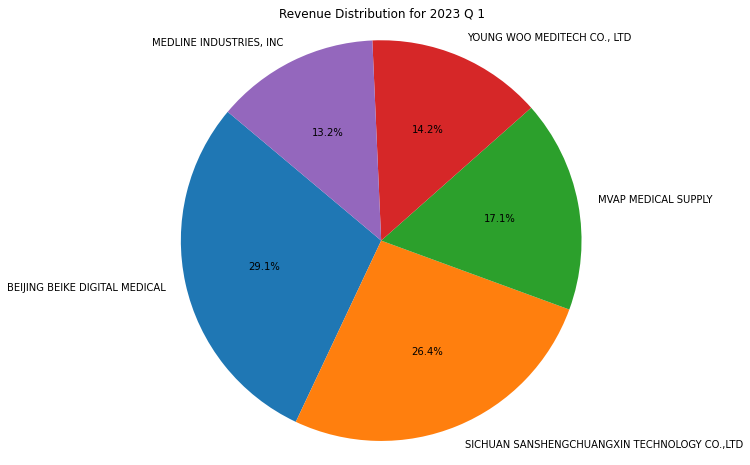

In [5]:
import matplotlib.pyplot as plt

# top five accounts per quarter by revenue
# pie charts sometimes reveal more by pie slices than looking at bar chart columns
quarter_to_plot = '2023 Q 1'  # choose the quarter

# Filter data for the selected quarter
quarter_data = top_accounts_by_quarter[top_accounts_by_quarter['quarter'].str.startswith(quarter_to_plot)]

# Plotting a pie chart for the selected quarter
plt.figure(figsize=(8, 8))
plt.pie(quarter_data['total_revenue'], labels=quarter_data['customer_account_name'], autopct='%1.1f%%', startangle=140)
plt.title(f'Revenue Distribution for {quarter_to_plot}')
plt.axis('equal')
plt.show()


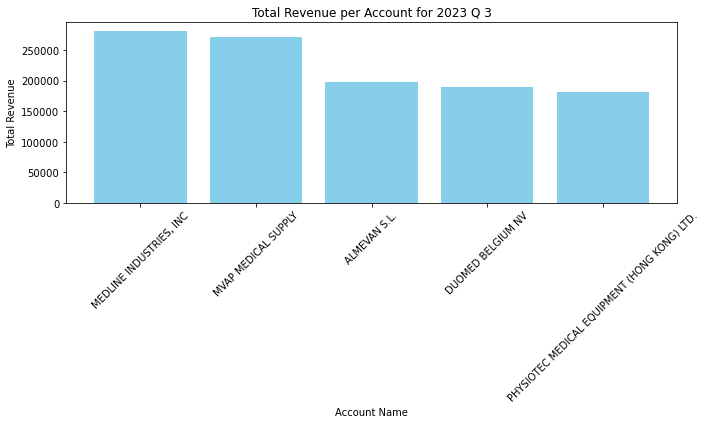

In [6]:
# top five accounts per quarter by revenue
quarter_to_plot = '2023 Q 3'  # choose the quarter

# Filter data for the selected quarter
quarter_data = top_accounts_by_quarter[top_accounts_by_quarter['quarter'].str.startswith(quarter_to_plot)]

# Plotting a bar chart for the selected quarter
plt.figure(figsize=(10, 6))
plt.bar(quarter_data['customer_account_name'], quarter_data['total_revenue'], color='skyblue')
plt.xlabel('Account Name')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue per Account for {quarter_to_plot}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


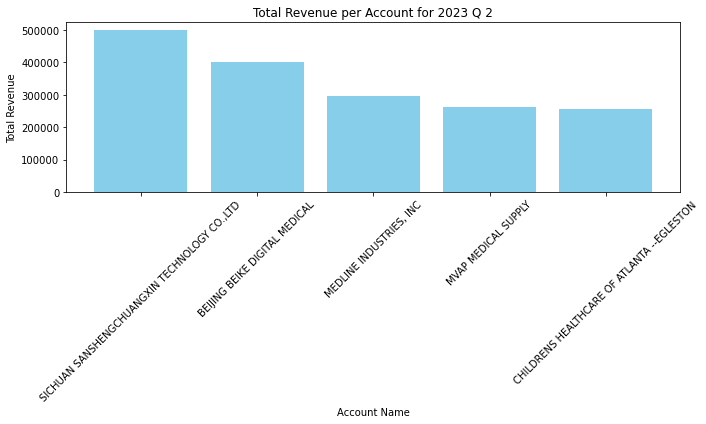

In [7]:
# top five accounts per quarter by revenue
quarter_to_plot = '2023 Q 2'  # choose the quarter

# Filter data for the selected quarter
quarter_data = top_accounts_by_quarter[top_accounts_by_quarter['quarter'].str.startswith(quarter_to_plot)]

# Plotting a bar chart for the selected quarter
plt.figure(figsize=(10, 6))
plt.bar(quarter_data['customer_account_name'], quarter_data['total_revenue'], color='skyblue')
plt.xlabel('Account Name')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue per Account for {quarter_to_plot}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


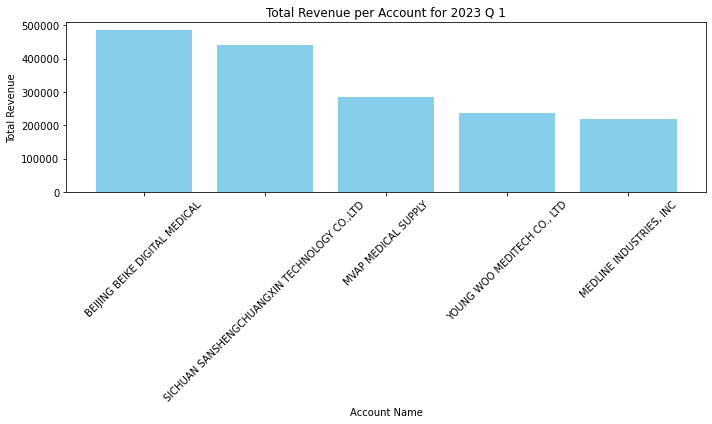

In [8]:
# top five accounts per quarter by revenue
quarter_to_plot = '2023 Q 1'  # choose the quarter

# Filter data for the selected quarter
quarter_data = top_accounts_by_quarter[top_accounts_by_quarter['quarter'].str.startswith(quarter_to_plot)]

# Plotting a bar chart for the selected quarter
plt.figure(figsize=(10, 6))
plt.bar(quarter_data['customer_account_name'], quarter_data['total_revenue'], color='skyblue')
plt.xlabel('Account Name')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue per Account for {quarter_to_plot}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


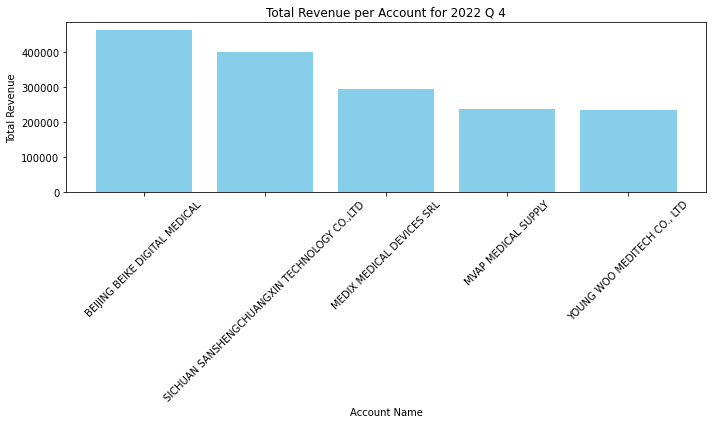

In [9]:
# top five accounts per quarter by revenue
quarter_to_plot = '2022 Q 4'  # choose the quarter

# Filter data for the selected quarter
quarter_data = top_accounts_by_quarter[top_accounts_by_quarter['quarter'].str.startswith(quarter_to_plot)]

# Plotting a bar chart for the selected quarter
plt.figure(figsize=(10, 6))
plt.bar(quarter_data['customer_account_name'], quarter_data['total_revenue'], color='skyblue')
plt.xlabel('Account Name')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue per Account for {quarter_to_plot}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


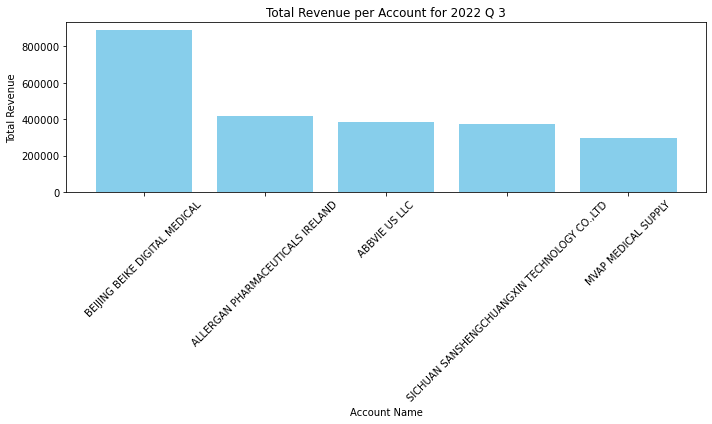

In [10]:
# top five accounts per quarter by revenue
quarter_to_plot = '2022 Q 3'  # choose the quarter

# Filter data for the selected quarter
quarter_data = top_accounts_by_quarter[top_accounts_by_quarter['quarter'].str.startswith(quarter_to_plot)]

# Plotting a bar chart for the selected quarter
plt.figure(figsize=(10, 6))
plt.bar(quarter_data['customer_account_name'], quarter_data['total_revenue'], color='skyblue')
plt.xlabel('Account Name')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue per Account for {quarter_to_plot}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


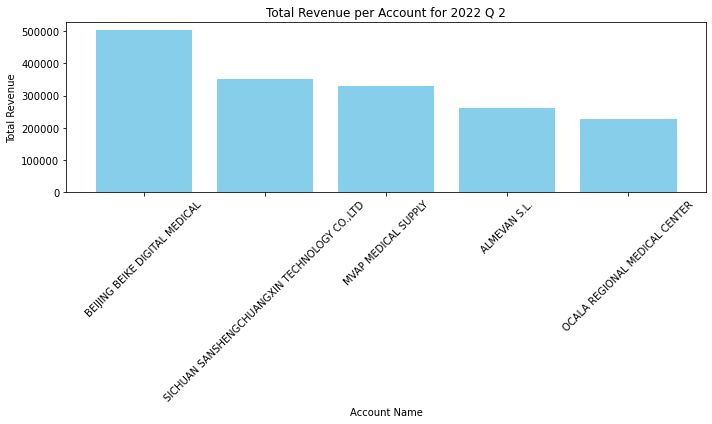

In [11]:
# top five accounts per quarter by revenue
quarter_to_plot = '2022 Q 2'  # choose the quarter

# Filter data for the selected quarter
quarter_data = top_accounts_by_quarter[top_accounts_by_quarter['quarter'].str.startswith(quarter_to_plot)]

# Plotting a bar chart for the selected quarter
plt.figure(figsize=(10, 6))
plt.bar(quarter_data['customer_account_name'], quarter_data['total_revenue'], color='skyblue')
plt.xlabel('Account Name')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue per Account for {quarter_to_plot}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


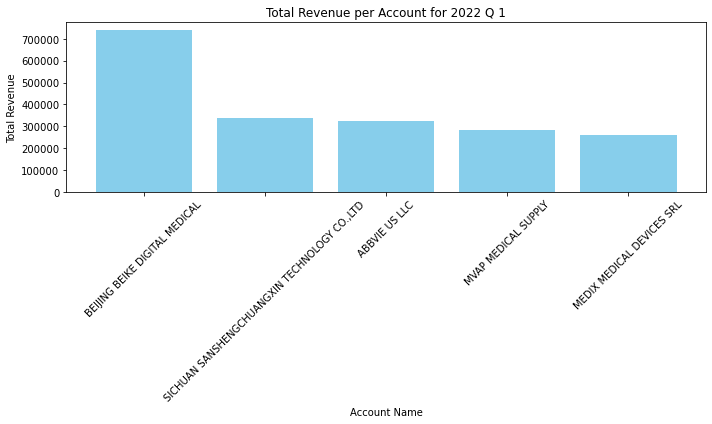

In [12]:
# top five accounts per quarter by revenue
quarter_to_plot = '2022 Q 1'  # choose the quarter

# Filter data for the selected quarter
quarter_data = top_accounts_by_quarter[top_accounts_by_quarter['quarter'].str.startswith(quarter_to_plot)]

# Plotting a bar chart for the selected quarter
plt.figure(figsize=(10, 6))
plt.bar(quarter_data['customer_account_name'], quarter_data['total_revenue'], color='skyblue')
plt.xlabel('Account Name')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue per Account for {quarter_to_plot}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


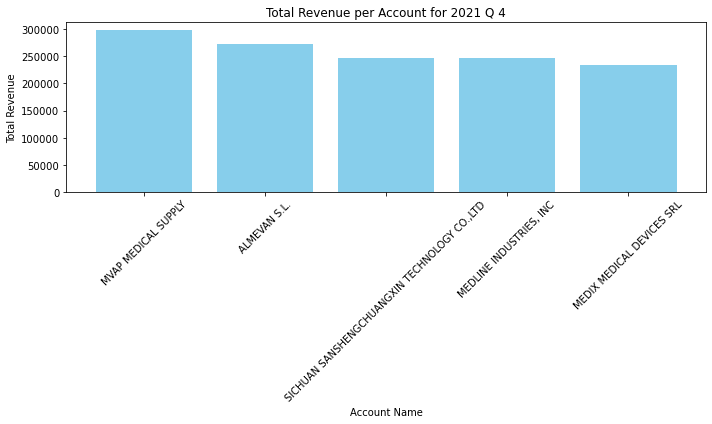

In [13]:
# top five accounts per quarter by revenue
quarter_to_plot = '2021 Q 4'  # choose the quarter

# Filter data for the selected quarter
quarter_data = top_accounts_by_quarter[top_accounts_by_quarter['quarter'].str.startswith(quarter_to_plot)]

# Plotting a bar chart for the selected quarter
plt.figure(figsize=(10, 6))
plt.bar(quarter_data['customer_account_name'], quarter_data['total_revenue'], color='skyblue')
plt.xlabel('Account Name')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue per Account for {quarter_to_plot}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


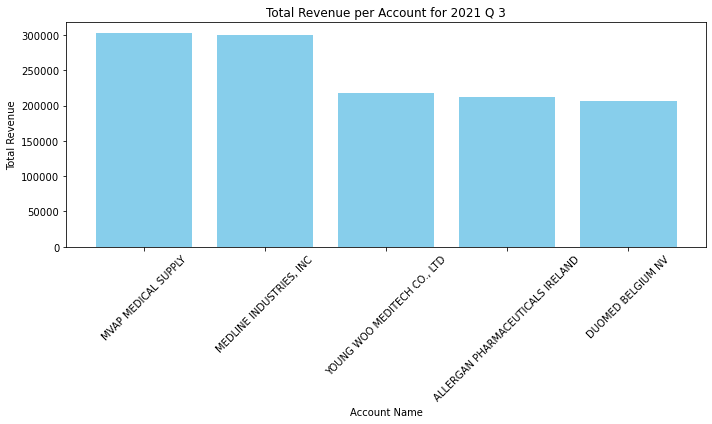

In [14]:
# top five accounts per quarter by revenue
quarter_to_plot = '2021 Q 3'  # choose the quarter

# Filter data for the selected quarter
quarter_data = top_accounts_by_quarter[top_accounts_by_quarter['quarter'].str.startswith(quarter_to_plot)]

# Plotting a bar chart for the selected quarter
plt.figure(figsize=(10, 6))
plt.bar(quarter_data['customer_account_name'], quarter_data['total_revenue'], color='skyblue')
plt.xlabel('Account Name')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue per Account for {quarter_to_plot}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


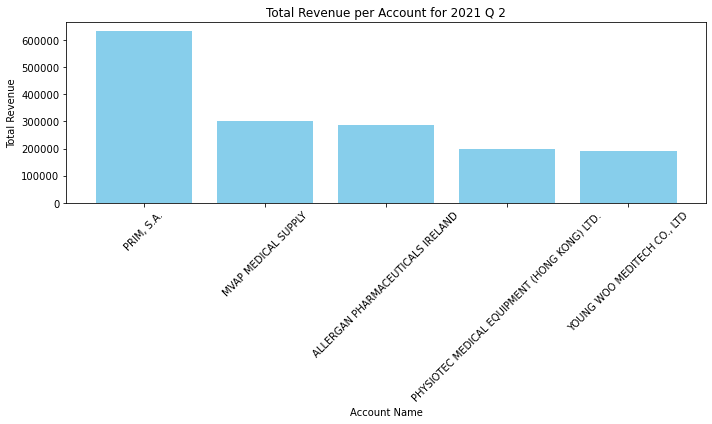

In [15]:
# top five accounts per quarter by revenue
quarter_to_plot = '2021 Q 2'  # choose the quarter

# Filter data for the selected quarter
quarter_data = top_accounts_by_quarter[top_accounts_by_quarter['quarter'].str.startswith(quarter_to_plot)]

# Plotting a bar chart for the selected quarter
plt.figure(figsize=(10, 6))
plt.bar(quarter_data['customer_account_name'], quarter_data['total_revenue'], color='skyblue')
plt.xlabel('Account Name')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue per Account for {quarter_to_plot}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


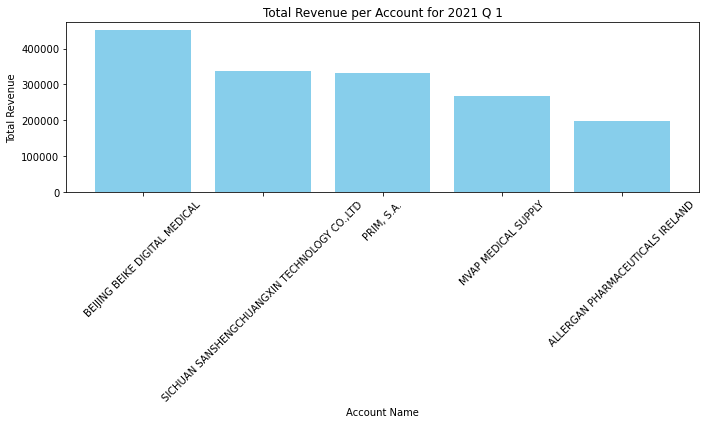

In [16]:
# top five accounts per quarter by revenue
quarter_to_plot = '2021 Q 1'  # choose the quarter

# Filter data for the selected quarter
quarter_data = top_accounts_by_quarter[top_accounts_by_quarter['quarter'].str.startswith(quarter_to_plot)]

# Plotting a bar chart for the selected quarter
plt.figure(figsize=(10, 6))
plt.bar(quarter_data['customer_account_name'], quarter_data['total_revenue'], color='skyblue')
plt.xlabel('Account Name')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue per Account for {quarter_to_plot}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


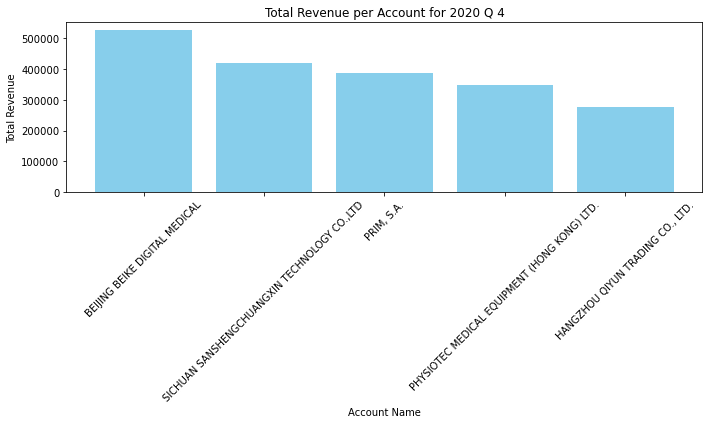

In [17]:
# top five accounts per quarter by revenue
quarter_to_plot = '2020 Q 4'  # choose the quarter

# Filter data for the selected quarter
quarter_data = top_accounts_by_quarter[top_accounts_by_quarter['quarter'].str.startswith(quarter_to_plot)]

# Plotting a bar chart for the selected quarter
plt.figure(figsize=(10, 6))
plt.bar(quarter_data['customer_account_name'], quarter_data['total_revenue'], color='skyblue')
plt.xlabel('Account Name')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue per Account for {quarter_to_plot}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


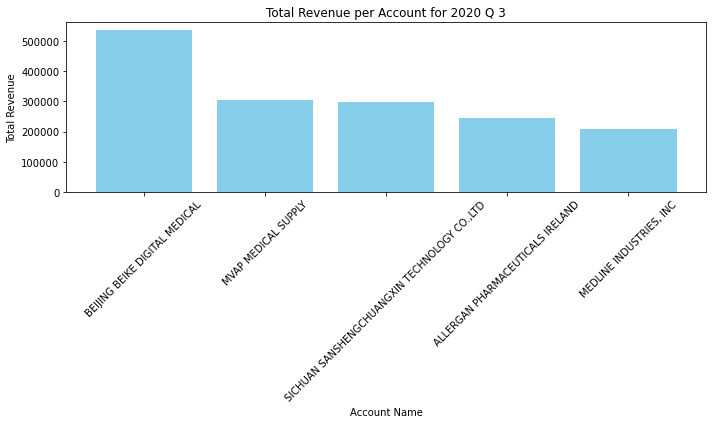

In [18]:
# top five accounts per quarter by revenue
quarter_to_plot = '2020 Q 3'  # choose the quarter

# Filter data for the selected quarter
quarter_data = top_accounts_by_quarter[top_accounts_by_quarter['quarter'].str.startswith(quarter_to_plot)]

# Plotting a bar chart for the selected quarter
plt.figure(figsize=(10, 6))
plt.bar(quarter_data['customer_account_name'], quarter_data['total_revenue'], color='skyblue')
plt.xlabel('Account Name')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue per Account for {quarter_to_plot}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


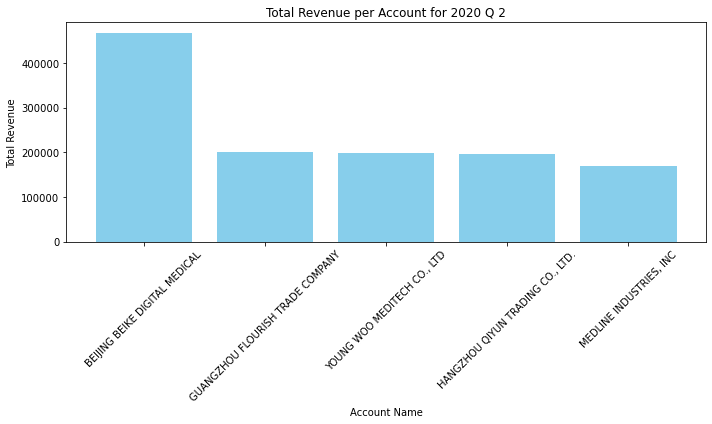

In [19]:
# top five accounts per quarter by revenue
quarter_to_plot = '2020 Q 2'  # choose the quarter

# Filter data for the selected quarter
quarter_data = top_accounts_by_quarter[top_accounts_by_quarter['quarter'].str.startswith(quarter_to_plot)]

# Plotting a bar chart for the selected quarter
plt.figure(figsize=(10, 6))
plt.bar(quarter_data['customer_account_name'], quarter_data['total_revenue'], color='skyblue')
plt.xlabel('Account Name')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue per Account for {quarter_to_plot}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


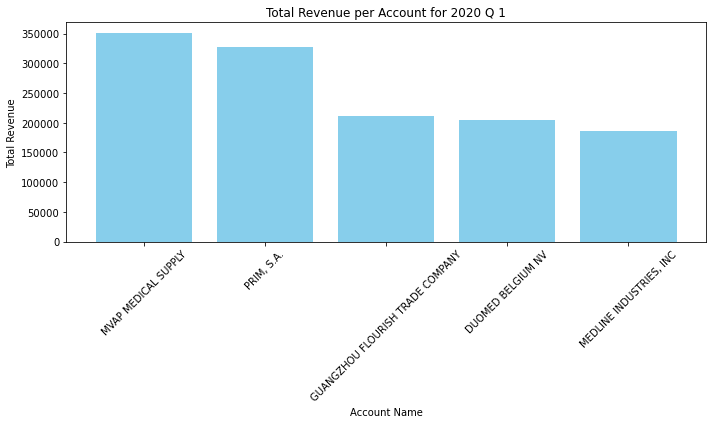

In [20]:
# top five accounts per quarter by revenue
quarter_to_plot = '2020 Q 1'  # choose the quarter

# Filter data for the selected quarter
quarter_data = top_accounts_by_quarter[top_accounts_by_quarter['quarter'].str.startswith(quarter_to_plot)]

# Plotting a bar chart for the selected quarter
plt.figure(figsize=(10, 6))
plt.bar(quarter_data['customer_account_name'], quarter_data['total_revenue'], color='skyblue')
plt.xlabel('Account Name')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue per Account for {quarter_to_plot}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


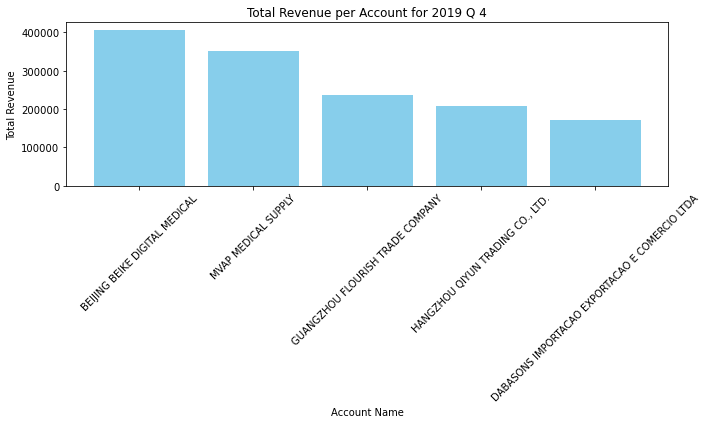

In [21]:
# top five accounts per quarter by revenue
quarter_to_plot = '2019 Q 4'  # choose the quarter

# Filter data for the selected quarter
quarter_data = top_accounts_by_quarter[top_accounts_by_quarter['quarter'].str.startswith(quarter_to_plot)]

# Plotting a bar chart for the selected quarter
plt.figure(figsize=(10, 6))
plt.bar(quarter_data['customer_account_name'], quarter_data['total_revenue'], color='skyblue')
plt.xlabel('Account Name')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue per Account for {quarter_to_plot}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


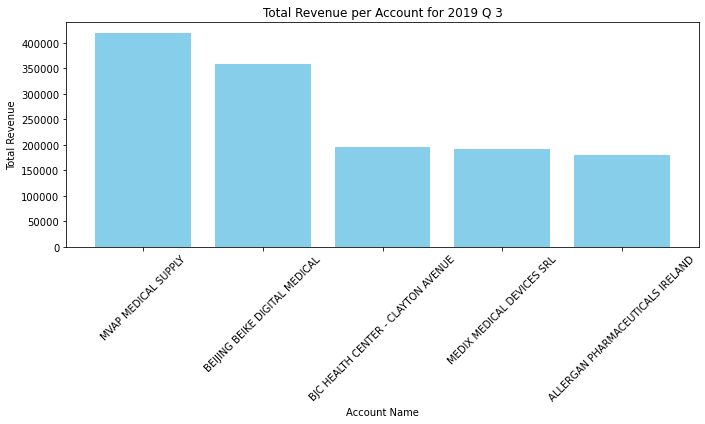

In [22]:
# top five accounts per quarter by revenue
quarter_to_plot = '2019 Q 3'  # choose the quarter

# Filter data for the selected quarter
quarter_data = top_accounts_by_quarter[top_accounts_by_quarter['quarter'].str.startswith(quarter_to_plot)]

# Plotting a bar chart for the selected quarter
plt.figure(figsize=(10, 6))
plt.bar(quarter_data['customer_account_name'], quarter_data['total_revenue'], color='skyblue')
plt.xlabel('Account Name')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue per Account for {quarter_to_plot}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


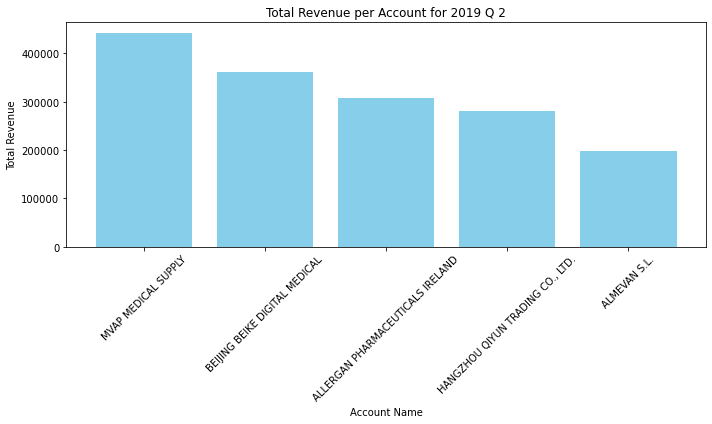

In [23]:
# top five accounts per quarter by revenue
quarter_to_plot = '2019 Q 2'  # choose the quarter

# Filter data for the selected quarter
quarter_data = top_accounts_by_quarter[top_accounts_by_quarter['quarter'].str.startswith(quarter_to_plot)]

# Plotting a bar chart for the selected quarter
plt.figure(figsize=(10, 6))
plt.bar(quarter_data['customer_account_name'], quarter_data['total_revenue'], color='skyblue')
plt.xlabel('Account Name')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue per Account for {quarter_to_plot}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


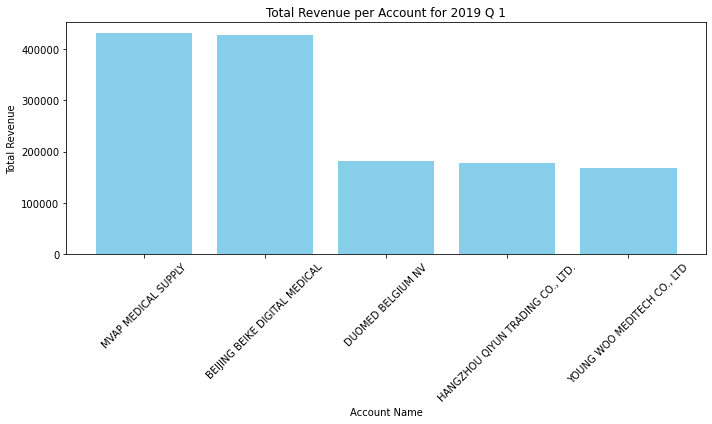

In [24]:
# top five accounts per quarter by revenue
quarter_to_plot = '2019 Q 1'  # choose the quarter

# Filter data for the selected quarter
quarter_data = top_accounts_by_quarter[top_accounts_by_quarter['quarter'].str.startswith(quarter_to_plot)]

# Plotting a bar chart for the selected quarter
plt.figure(figsize=(10, 6))
plt.bar(quarter_data['customer_account_name'], quarter_data['total_revenue'], color='skyblue')
plt.xlabel('Account Name')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue per Account for {quarter_to_plot}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


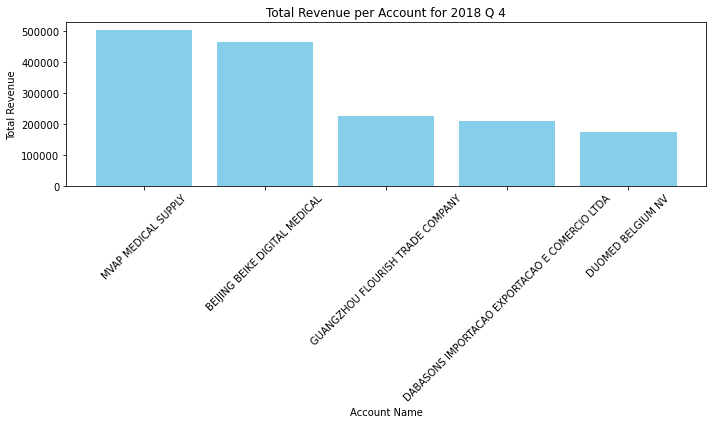

In [25]:
# top five accounts per quarter by revenue
quarter_to_plot = '2018 Q 4'  # choose the quarter

# Filter data for the selected quarter
quarter_data = top_accounts_by_quarter[top_accounts_by_quarter['quarter'].str.startswith(quarter_to_plot)]

# Plotting a bar chart for the selected quarter
plt.figure(figsize=(10, 6))
plt.bar(quarter_data['customer_account_name'], quarter_data['total_revenue'], color='skyblue')
plt.xlabel('Account Name')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue per Account for {quarter_to_plot}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


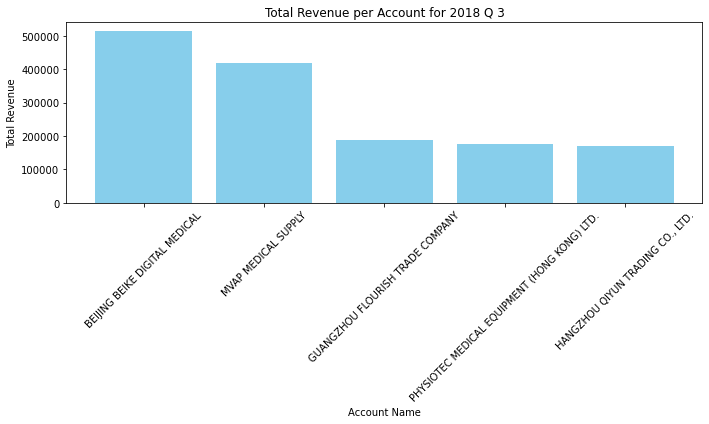

In [26]:
# top five accounts per quarter by revenue
quarter_to_plot = '2018 Q 3'  # choose the quarter

# Filter data for the selected quarter
quarter_data = top_accounts_by_quarter[top_accounts_by_quarter['quarter'].str.startswith(quarter_to_plot)]

# Plotting a bar chart for the selected quarter
plt.figure(figsize=(10, 6))
plt.bar(quarter_data['customer_account_name'], quarter_data['total_revenue'], color='skyblue')
plt.xlabel('Account Name')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue per Account for {quarter_to_plot}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


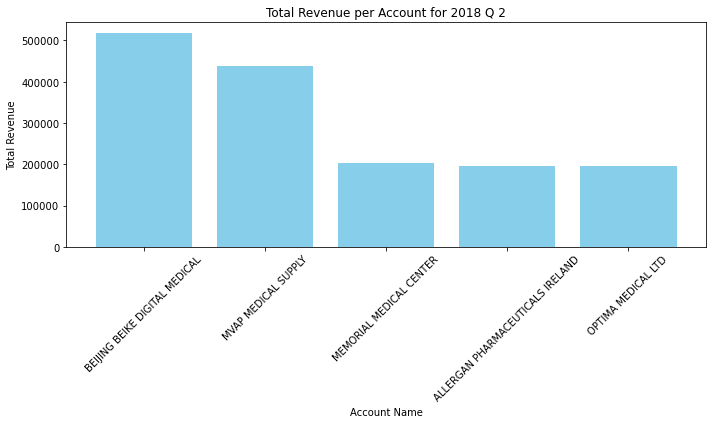

In [27]:
# top five accounts per quarter by revenue
quarter_to_plot = '2018 Q 2'  # choose the quarter

# Filter data for the selected quarter
quarter_data = top_accounts_by_quarter[top_accounts_by_quarter['quarter'].str.startswith(quarter_to_plot)]

# Plotting a bar chart for the selected quarter
plt.figure(figsize=(10, 6))
plt.bar(quarter_data['customer_account_name'], quarter_data['total_revenue'], color='skyblue')
plt.xlabel('Account Name')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue per Account for {quarter_to_plot}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


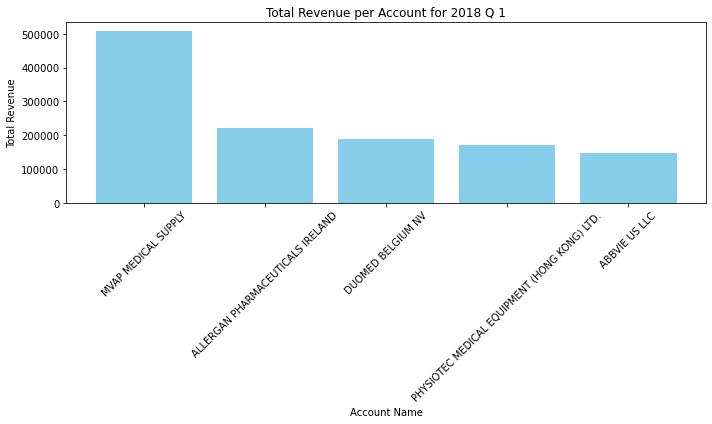

In [28]:
# top five accounts per quarter by revenue
quarter_to_plot = '2018 Q 1'  # choose the quarter

# Filter data for the selected quarter
quarter_data = top_accounts_by_quarter[top_accounts_by_quarter['quarter'].str.startswith(quarter_to_plot)]

# Plotting a bar chart for the selected quarter
plt.figure(figsize=(10, 6))
plt.bar(quarter_data['customer_account_name'], quarter_data['total_revenue'], color='skyblue')
plt.xlabel('Account Name')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue per Account for {quarter_to_plot}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


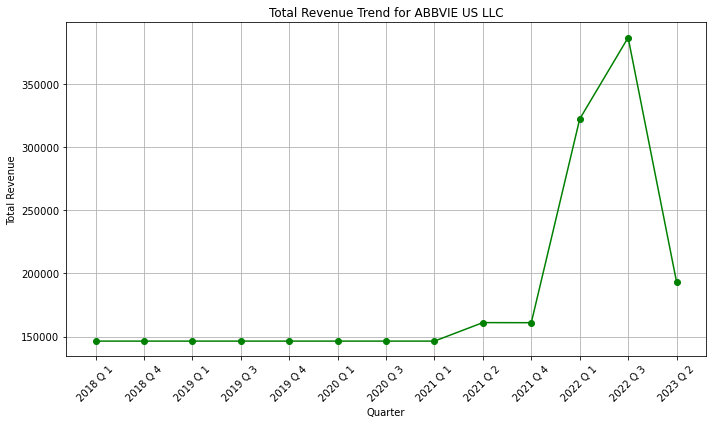

In [71]:
# random selection of accounts to visualize quarterly and annual trends
account_to_plot = 'ABBVIE US LLC'  # interesting, the kind of account that needs additional research for buying pattern

# Filter data for the selected account
account_data = top_accounts_by_quarter[top_accounts_by_quarter['customer_account_name'] == account_to_plot]

# Plotting a line chart for the selected account
plt.figure(figsize=(10, 6))
plt.plot(account_data['quarter'], account_data['total_revenue'], marker='o', color='green')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue Trend for {account_to_plot}')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


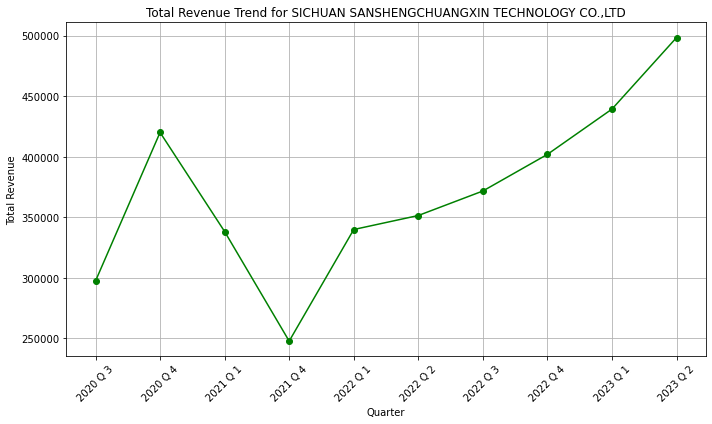

In [30]:
# random selection of accounts to visualize quarterly and annual trends
account_to_plot = 'SICHUAN SANSHENGCHUANGXIN TECHNOLOGY CO.,LTD'  # new China market distribution partner

# Filter data for the selected account
account_data = top_accounts_by_quarter[top_accounts_by_quarter['customer_account_name'] == account_to_plot]

# Plotting a line chart for the selected account
plt.figure(figsize=(10, 6))
plt.plot(account_data['quarter'], account_data['total_revenue'], marker='o', color='green')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue Trend for {account_to_plot}')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


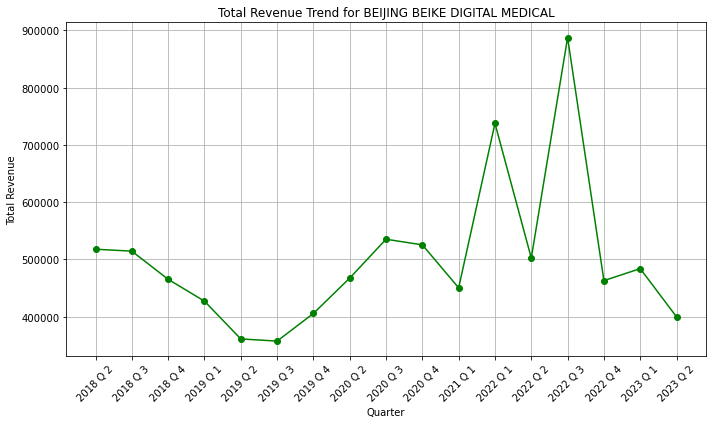

In [31]:
# random selection of accounts to visualize quarterly and annual trends
account_to_plot = 'BEIJING BEIKE DIGITAL MEDICAL'  # China market, the trend is misleading, product shortage influencing
                                                   # shipment patterns in 2023

# Filter data for the selected account
account_data = top_accounts_by_quarter[top_accounts_by_quarter['customer_account_name'] == account_to_plot]

# Plotting a line chart for the selected account
plt.figure(figsize=(10, 6))
plt.plot(account_data['quarter'], account_data['total_revenue'], marker='o', color='green')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue Trend for {account_to_plot}')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


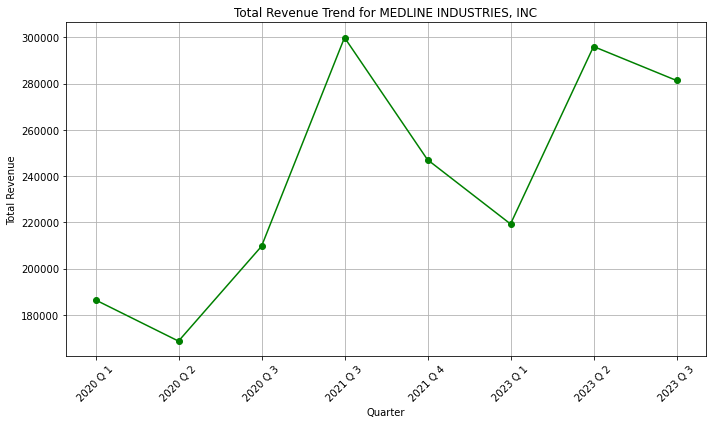

In [32]:
# random selection of accounts to visualize quarterly and annual trends
account_to_plot = 'MEDLINE INDUSTRIES, INC'  # top five US account, and the trend shows a sharp spike, then steady

# Filter data for the selected account
account_data = top_accounts_by_quarter[top_accounts_by_quarter['customer_account_name'] == account_to_plot]

# Plotting a line chart for the selected account
plt.figure(figsize=(10, 6))
plt.plot(account_data['quarter'], account_data['total_revenue'], marker='o', color='green')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue Trend for {account_to_plot}')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


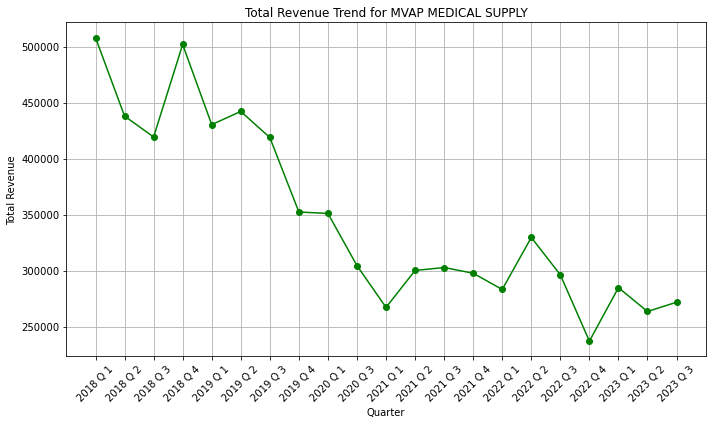

In [33]:
# random selection of accounts to visualize quarterly and annual trends
account_to_plot = 'MVAP MEDICAL SUPPLY'  # MVAP is the biggest US account, but this is a distributor so more 
                                         # focus on direct markets

# Filter data for the selected account
account_data = top_accounts_by_quarter[top_accounts_by_quarter['customer_account_name'] == account_to_plot]

# Plotting a line chart for the selected account
plt.figure(figsize=(10, 6))
plt.plot(account_data['quarter'], account_data['total_revenue'], marker='o', color='green')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue Trend for {account_to_plot}')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


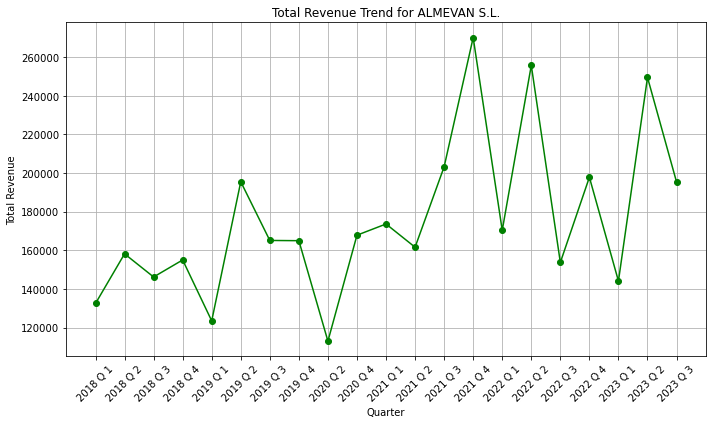

In [70]:
# random selection of accounts to visualize quarterly and annual trends
account_to_plot = 'ALMEVAN S.L.'  # lots of fluctation with this account but high spend each quarter

# Filter data for the selected account
account_data = top_accounts_by_quarter[top_accounts_by_quarter['customer_account_name'] == account_to_plot]

# Plotting a line chart for the selected account
plt.figure(figsize=(10, 6))
plt.plot(account_data['quarter'], account_data['total_revenue'], marker='o', color='green')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue Trend for {account_to_plot}')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


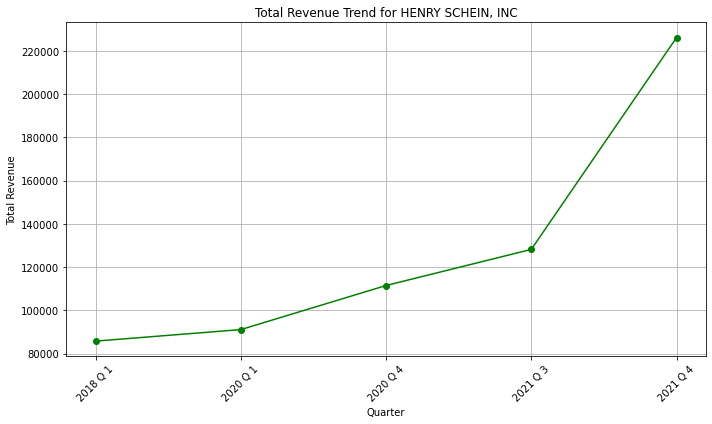

In [78]:
# random selection of accounts to visualize quarterly and annual trends
account_to_plot = 'HENRY SCHEIN, INC'  # this is an account that started high, then dropped off after 2021

# Filter data for the selected account
account_data = top_accounts_by_quarter[top_accounts_by_quarter['customer_account_name'] == account_to_plot]

# Plotting a line chart for the selected account
plt.figure(figsize=(10, 6))
plt.plot(account_data['quarter'], account_data['total_revenue'], marker='o', color='green')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue Trend for {account_to_plot}')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

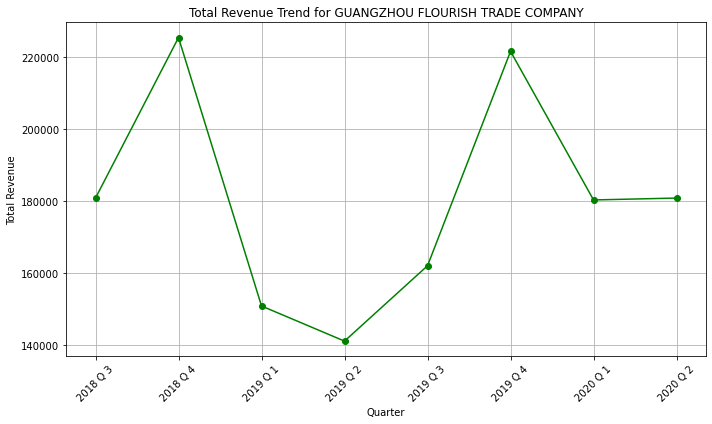

In [77]:
# random selection of accounts to visualize quarterly and annual trends
account_to_plot = 'GUANGZHOU FLOURISH TRADE COMPANY'  # this account is one that Natus lost, no more spend after 2020 Q2

# Filter data for the selected account
account_data = top_accounts_by_quarter[top_accounts_by_quarter['customer_account_name'] == account_to_plot]

# Plotting a line chart for the selected account
plt.figure(figsize=(10, 6))
plt.plot(account_data['quarter'], account_data['total_revenue'], marker='o', color='green')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.title(f'Total Revenue Trend for {account_to_plot}')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [37]:
import pandas as pd
import sqlite3

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('catheter_shipments.csv', encoding='latin-1')

# Establish a connection to the SQLite database
conn = sqlite3.connect('df_table.db')

# Convert the DataFrame to a SQLite table
df.to_sql('df_table', conn, index=False, if_exists='replace')

# Define SQL query to get the top 10 accounts for each month
query = '''
    SELECT customer_account_name, quarter, 
      customer_type, product_group, product_sub_type, SUM(revenue) AS total_revenue
    FROM df_table
    GROUP BY customer_account_name, quarter, customer_type, 
      product_group, product_sub_type
    ORDER BY month, total_revenue DESC
'''

# Execute the query using pandas' read_sql_query() function
df_result = pd.read_sql_query(query, conn)

# Get top 10 accounts by revenue for each quarter
top_accounts_by_quarter = df_result.groupby('quarter').apply(lambda x: x.nlargest(10, 'total_revenue')).reset_index(drop=True)

# Display the top 10 accounts by revenue for each month
print(top_accounts_by_quarter)

# Close the connection
conn.close()


                                 customer_account_name   quarter  \
0                                  MVAP MEDICAL SUPPLY  2018 Q 1   
1                     ALLERGAN PHARMACEUTICALS IRELAND  2018 Q 1   
2                                    DUOMED BELGIUM NV  2018 Q 1   
3         PHYSIOTEC MEDICAL EQUIPMENT (HONG KONG) LTD.  2018 Q 1   
4                                        ABBVIE US LLC  2018 Q 1   
..                                                 ...       ...   
226                            MEDLINE INDUSTRIES, INC  2023 Q 3   
227                        BEAUMONT HOSPITAL-ROYAL OAK  2023 Q 3   
228                                 OPTIMA MEDICAL LTD  2023 Q 3   
229                 STANFORD UNIVERSITY MEDICAL CENTER  2023 Q 3   
230  KAISER PERMANENTE SOUTH SACRAMENTO MEDICAL CENTER  2023 Q 4   

    customer_type       product_group product_sub_type  total_revenue  
0     Hosp/Clinic                 EEG       Electrodes      475483.45  
1        Customer                 EMG  

In [38]:
import statsmodels.api as sm

# total_revenue is the target variable and quarter is the predictor variable
X = pd.get_dummies(top_accounts_by_quarter['quarter'], drop_first=True)  # Convert 'quarter' to dummy variables
y = top_accounts_by_quarter['total_revenue']  # Target variable

X = sm.add_constant(X)  # Add a constant for intercept

model = sm.OLS(y, X).fit()  # Fit Ordinary Least Squares (OLS) regression model


In [39]:
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          total_revenue   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1.287
Date:                Wed, 06 Dec 2023   Prob (F-statistic):              0.179
Time:                        19:06:40   Log-Likelihood:                -2986.6
No. Observations:                 231   AIC:                             6021.
Df Residuals:                     207   BIC:                             6104.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.646e+05   3.33e+04      4.942      0.0

In [40]:
from sklearn.linear_model import LinearRegression

# total_revenue is the target variable and quarter is the predictor variable
X = pd.get_dummies(top_accounts_by_quarter['quarter'], drop_first=True)  # Convert 'quarter' to dummy variables
y = top_accounts_by_quarter['total_revenue']  # Target variable

model = LinearRegression()
model.fit(X, y)  # Fit Linear Regression model


LinearRegression()

In [41]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Coefficients: [  50588.683   39171.789   48720.714   17510.701   45432.417   31276.342
   27175.956    9927.622  -24645.08    32835.742   93365.449   60104.954
   65448.05    13523.432   19813.021   89381.269   54669.077  135422.254
   55392.213   21048.86    52272.872  -19469.659 -162658.574]
Intercept: 164624.37399999987


In [42]:
import statsmodels.api as sm

# total_revenue is the target variable, and five different predictor variables
X = pd.get_dummies(top_accounts_by_quarter[['quarter', 'customer_account_name', 
                                            'customer_type', 'product_group', 
                                            'product_sub_type']], drop_first=True)  # Convert categorical variables to dummies
y = top_accounts_by_quarter['total_revenue']  # Target variable

X = sm.add_constant(X)  # Add a constant for intercept

model = sm.OLS(y, X).fit()  # Fit Ordinary Least Squares (OLS) multiple regression model


In [43]:
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          total_revenue   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5.093
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           1.47e-17
Time:                        19:06:40   Log-Likelihood:                -2873.3
No. Observations:                 231   AIC:                             5881.
Df Residuals:                     164   BIC:                             6111.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [44]:
from sklearn.linear_model import LinearRegression

# total_revenue is the target variable, and five different predictor variables
X = pd.get_dummies(top_accounts_by_quarter[['quarter', 'customer_account_name', 
                                           'customer_type', 'product_group', 
                                           'product_sub_type']], drop_first=True)  # Convert categorical variables to dummies
y = top_accounts_by_quarter['total_revenue']  # Target variable

model = LinearRegression()
model.fit(X, y)  # Fit Linear Regression model


LinearRegression()

In [45]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Coefficients: [ 1.38992033e+04 -1.57495435e+04  8.00207471e+03 -4.57736325e+04
 -5.41504800e+03 -2.68220680e+04 -5.25445379e+04 -3.06357860e+04
 -6.49787097e+04 -2.34294030e+04  2.42145401e+04 -2.18421647e+04
  3.38205012e+04  8.15213115e+03  4.40915255e+03  3.51077462e+04
  2.80634755e+04  7.55199260e+04  1.37000820e+04 -2.36701645e+04
 -1.03395922e+04 -3.95305858e+03 -1.00387720e+17 -7.79484664e+16
 -7.79484664e+16 -3.11821169e+17 -7.79484664e+16 -7.79484664e+16
 -7.79484664e+16 -7.79484664e+16 -7.79484664e+16 -7.79484664e+16
  4.27809547e+16 -7.79484664e+16 -6.66801883e+04 -7.79484664e+16
 -3.11821169e+17  4.27809547e+16 -7.79484664e+16 -7.79484664e+16
  7.27647290e+17  1.12198338e+16  4.27809547e+16 -7.79484664e+16
  9.38668077e+16 -3.11821169e+17  7.27647290e+17 -7.79484664e+16
  3.25461570e+17 -7.79484664e+16 -3.11821169e+17  4.27809547e+16
 -3.11821169e+17  7.27647290e+17 -7.79484664e+16 -3.11821169e+17
 -7.79484664e+16  4.27809547e+16  2.60803707e+17 -7.79484664e+16
  4.2780954

In [46]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

# total_revenue is the target variable, and five different predictor variables
X = pd.get_dummies(top_accounts_by_quarter[['quarter', 'customer_account_name', 
                                           'customer_type', 'product_group',
                                           'product_sub_type']], drop_first=True)  # Convert categorical variables to dummies
y = top_accounts_by_quarter['total_revenue']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for alpha values
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize Ridge regression
ridge = Ridge()

# Use GridSearchCV to find the best alpha value using cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha value: {best_alpha}")

# Train Ridge regression using the best alpha
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train_scaled, y_train)

# Evaluate the model
train_score = best_ridge.score(X_train_scaled, y_train)
test_score = best_ridge.score(X_test_scaled, y_test)
print(f"Train R-squared: {train_score:.4f}")
print(f"Test R-squared: {test_score:.4f}")


Best alpha value: 100
Train R-squared: 0.5961
Test R-squared: 0.4609


In [47]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# total_revenue is the target variable, and five different predictor variables
X = pd.get_dummies(top_accounts_by_quarter[['quarter', 'customer_account_name', 
                                         'customer_type', 'product_group',
                                         'product_sub_type']], drop_first=True)
y = top_accounts_by_quarter['total_revenue']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Select top k features based on f_regression scores
selector = SelectKBest(score_func=f_regression, k=25)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Initialize and train Ridge regression
ridge = Ridge(alpha=1.0)  # You can set your alpha value here
ridge.fit(X_train_selected, y_train)

# Predict on train and test sets
train_preds = ridge.predict(X_train_selected)
test_preds = ridge.predict(X_test_selected)

# Calculate R-squared scores
train_score = r2_score(y_train, train_preds)
test_score = r2_score(y_test, test_preds)

print(f"Train R-squared: {train_score:.4f}")
print(f"Test R-squared: {test_score:.4f}")


Train R-squared: 0.5661
Test R-squared: 0.5425


C:\Users\mark.hanson\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms


In [48]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# total_revenue is the target variable, and five different predictor variables
X = pd.get_dummies(top_accounts_by_quarter[['quarter', 'customer_account_name', 
                                         'customer_type', 'product_group',
                                         'product_sub_type']], drop_first=True)
y = top_accounts_by_quarter['total_revenue']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Select top k features based on f_regression scores
selector = SelectKBest(score_func=f_regression, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Initialize and train Ridge regression
ridge = Ridge(alpha=1.0)  # You can set your alpha value here
ridge.fit(X_train_selected, y_train)

# Predict on train and test sets
train_preds = ridge.predict(X_train_selected)
test_preds = ridge.predict(X_test_selected)

# Calculate R-squared scores
train_score = r2_score(y_train, train_preds)
test_score = r2_score(y_test, test_preds)

print(f"Train R-squared: {train_score:.4f}")
print(f"Test R-squared: {test_score:.4f}")


Train R-squared: 0.4381
Test R-squared: 0.3396


C:\Users\mark.hanson\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms


In [49]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# total_revenue is the target variable, and five different predictor variables
X = pd.get_dummies(top_accounts_by_quarter[['quarter', 'customer_account_name', 
                                         'customer_type', 'product_group',
                                         'product_sub_type']], drop_first=True)
y = top_accounts_by_quarter['total_revenue']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Select top k features based on f_regression scores
selector = SelectKBest(score_func=f_regression, k=5)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Initialize and train Ridge regression
ridge = Ridge(alpha=1.0)  # You can set your alpha value here
ridge.fit(X_train_selected, y_train)

# Predict on train and test sets
train_preds = ridge.predict(X_train_selected)
test_preds = ridge.predict(X_test_selected)

# Calculate R-squared scores
train_score = r2_score(y_train, train_preds)
test_score = r2_score(y_test, test_preds)

print(f"Train R-squared: {train_score:.4f}")
print(f"Test R-squared: {test_score:.4f}")


Train R-squared: 0.3636
Test R-squared: 0.2206


C:\Users\mark.hanson\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms


In [51]:
import pandas as pd
import sqlite3

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('catheter_shipments.csv', encoding='latin-1')

# Establish a connection to the SQLite database
conn = sqlite3.connect('df_table.db')

# Convert the DataFrame to a SQLite table
df.to_sql('df_table', conn, index=False, if_exists='replace')

# Define SQL query to get the top 5 accounts for each month
query = '''
    SELECT customer_account_name, month, 
        customer_type, product_group, product_sub_type, SUM(revenue) AS total_revenue
    FROM df_table
    GROUP BY customer_account_name, month, customer_type, product_group, product_sub_type
    ORDER BY month, total_revenue DESC
'''

# Execute the query using pandas
df_result = pd.read_sql_query(query, conn)

# Get top 5 accounts by revenue for each quarter
top_accounts_by_month = df_result.groupby('month').apply(lambda x: x.nlargest(10, 'total_revenue')).reset_index(drop=True)

# Display the top 10 accounts by revenue for each month
print(top_accounts_by_month)

# Close the connection
conn.close()


                                 customer_account_name      month  \
0                                  MVAP MEDICAL SUPPLY  2018 / 01   
1                     ALLERGAN PHARMACEUTICALS IRELAND  2018 / 01   
2                                    DUOMED BELGIUM NV  2018 / 01   
3                                   DRASKO SIMOVIC, MD  2018 / 01   
4                                     SYNGROWTH CO LTD  2018 / 01   
..                                                 ...        ...   
686                            MEDLINE INDUSTRIES, INC  2023 / 09   
687                                  DUOMED BELGIUM NV  2023 / 09   
688                          MCLAREN NORTHERN MICHIGAN  2023 / 09   
689                          TEXAS CHILDREN'S HOSPITAL  2023 / 09   
690  KAISER PERMANENTE SOUTH SACRAMENTO MEDICAL CENTER  2023 / 10   

    customer_type       product_group product_sub_type  total_revenue  
0     Hosp/Clinic                 EEG       Electrodes      164747.25  
1        Customer          

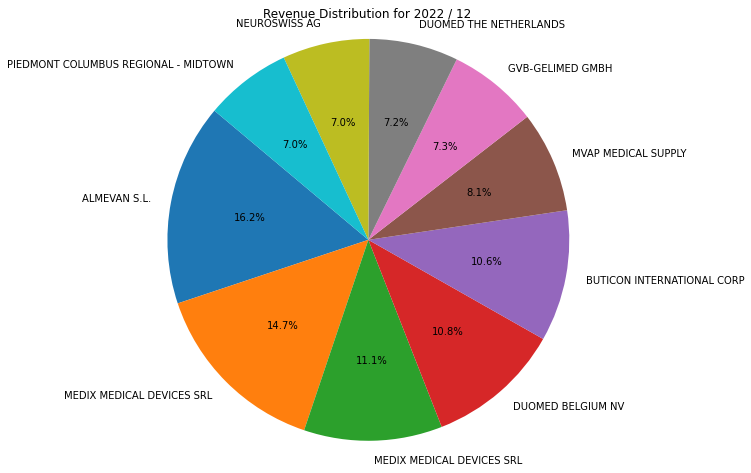

In [52]:
import matplotlib.pyplot as plt

# specific selection of a month and year in dataset format
month_to_plot = '2022 / 12'  # pie chart with 10 pie slices, still appears more interesting

# Filter data for the selected quarter
month_data = top_accounts_by_month[top_accounts_by_month['month'].str.startswith(month_to_plot)]

# Plotting a pie chart for the selected quarter
plt.figure(figsize=(8, 8))
plt.pie(month_data['total_revenue'], labels=month_data['customer_account_name'], autopct='%1.1f%%', startangle=140)
plt.title(f'Revenue Distribution for {month_to_plot}')
plt.axis('equal')
plt.show()


In [53]:
import statsmodels.api as sm

# total_revenue' is the target variable and month is the predictor variable
X = pd.get_dummies(top_accounts_by_month['month'], drop_first=True)  # Convert 'month' to dummy variables
y = top_accounts_by_month['total_revenue']  # Target variable

X = sm.add_constant(X)  # Add a constant for intercept

model = sm.OLS(y, X).fit()  # Fit Ordinary Least Squares (OLS) regression model


In [54]:
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          total_revenue   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     3.141
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           4.79e-14
Time:                        19:07:48   Log-Likelihood:                -8672.1
No. Observations:                 691   AIC:                         1.748e+04
Df Residuals:                     621   BIC:                         1.780e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.883e+04   2.28e+04      2.583      0.0

In [55]:
from sklearn.linear_model import LinearRegression

# total_revenue is the target variable and month is the predictor variable
X = pd.get_dummies(top_accounts_by_month['month'], drop_first=True)  # Convert 'month' to dummy variables
y = top_accounts_by_month['total_revenue']  # Target variable

model = LinearRegression()
model.fit(X, y)  # Fit Linear Regression model


LinearRegression()

In [56]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [  3532.879  16139.502  -4725.056  15243.026 102521.47    -233.667
  29465.807  80623.377  16837.261  63904.724  34824.914   -206.073
  59963.31   21515.022   2549.273   7546.568  90014.962 -10394.711
  28219.061  90653.195   6673.374  -2382.848  85568.522 -15341.139
  -4792.318  80317.396 -29277.832  20167.561  33806.481  -3906.693
   5882.493 102207.907    875.136  43103.123  99803.963  29879.544
 -14812.351 107598.47   -7265.368 106219.091  17714.656  19388.597
  28707.959  26716.434  10742.328   7120.19   53924.871 -16585.385
  73162.336  93589.185   4591.89   59107.027  19337.1   -10413.435
  51774.829 164826.009  40035.992  76357.485   7498.64  -15034.295
   9551.555  76450.42   18471.359  29549.762  81479.183  -5924.071
   1147.725   9285.008 -56861.276]
Intercept: 58827.07600000061


In [57]:
import statsmodels.api as sm

# total_revenue is the target variable, and five different predictor variables
X = pd.get_dummies(top_accounts_by_month[['month', 'customer_account_name', 
                                          'customer_type', 'product_group', 
                                          'product_sub_type']], drop_first=True)  # Convert categorical variables to dummies
y = top_accounts_by_month['total_revenue']  # Target variable

X = sm.add_constant(X)  # Add a constant for intercept

model = sm.OLS(y, X).fit()  # Fit Ordinary Least Squares (OLS) multiple regression model


In [58]:
print(model.summary)

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x000001EA95ECA100>>


In [59]:
from sklearn.linear_model import LinearRegression

# total_revenue is the target variable, and five different predictor variables
X = pd.get_dummies(top_accounts_by_month[['month', 'customer_account_name', 
                                         'customer_type', 'product_group', 
                                         'product_sub_type']], drop_first=True)  # Convert categorical variables to dummies
y = top_accounts_by_month['total_revenue']  # Target variable

model = LinearRegression()
model.fit(X, y)  # Fit Linear Regression model


LinearRegression()

In [60]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Coefficients: [ 7.83548868e+03 -1.45835014e+04 -2.43325024e+04  1.32375929e+04
  6.17529288e+04 -5.84871558e+03  3.50042801e+04  2.85972468e+04
  1.73888280e+04 -1.69711510e+03  3.13722535e+04  1.01254605e+03
 -3.50228462e+03 -2.29017746e+04 -1.57320356e+04 -5.24369213e+04
  4.79737676e+04 -6.87974022e+03  9.66809563e+03  2.94270354e+04
 -6.92728253e+03 -1.62911776e+04  9.32813082e+03  1.87884331e+03
  4.82101905e+03  1.43924609e+04 -4.04509954e+04 -1.72329867e+04
 -4.39676438e+03 -1.17190199e+04 -5.12470666e+03  3.97286640e+04
 -2.66503694e+04  3.61396407e+04  1.94630042e+04  2.69255351e+03
 -1.35839195e+04  4.12771424e+04  2.88321223e+03  7.28415399e+04
  7.86801769e+02  1.84309086e+04  1.51111820e+04  7.77105567e+03
  9.62014961e+03 -1.61556016e+04  3.05480528e+04 -3.92128424e+03
  5.79219944e+04  6.11774826e+04  1.51188370e+04  4.27919204e+04
  7.51860392e+03 -7.29288722e+03  3.86810340e+04  9.58842712e+04
  4.86172096e+04  4.20519721e+04  1.85733263e+04  8.93455732e+03
  9.7867173

In [61]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

# total_revenue is the target variable, and five different predictor variables
X = pd.get_dummies(top_accounts_by_month[['month', 'customer_account_name', 
                                         'customer_type', 'product_group',
                                         'product_sub_type']], 
                   drop_first=True)  # Convert categorical variables to dummies
y = top_accounts_by_month['total_revenue']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for alpha values
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize Ridge regression
ridge = Ridge()

# Use GridSearchCV to find the best alpha value using cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=25)
grid_search.fit(X_train_scaled, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha value: {best_alpha}")

# Train Ridge regression using the best alpha
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train_scaled, y_train)

# Evaluate the model
train_score = best_ridge.score(X_train_scaled, y_train)
test_score = best_ridge.score(X_test_scaled, y_test)
print(f"Train R-squared: {train_score:.4f}")
print(f"Test R-squared: {test_score:.4f}")



Best alpha value: 100
Train R-squared: 0.6455
Test R-squared: 0.3846


In [62]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

# total_revenue is the target variable, and five different predictor variables
X = pd.get_dummies(top_accounts_by_month[['month', 'customer_account_name', 
                                         'customer_type', 'product_group',
                                         'product_sub_type']], 
                   drop_first=True)  # Convert categorical variables to dummies
y = top_accounts_by_month['total_revenue']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for alpha values
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize Ridge regression
ridge = Ridge()

# Use GridSearchCV to find the best alpha value using cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=10)
grid_search.fit(X_train_scaled, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha value: {best_alpha}")

# Train Ridge regression using the best alpha
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train_scaled, y_train)

# Evaluate the model
train_score = best_ridge.score(X_train_scaled, y_train)
test_score = best_ridge.score(X_test_scaled, y_test)
print(f"Train R-squared: {train_score:.4f}")
print(f"Test R-squared: {test_score:.4f}")


Best alpha value: 100
Train R-squared: 0.6455
Test R-squared: 0.3846


In [63]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

# total_revenue is the target variable, and five different predictor variables
X = pd.get_dummies(top_accounts_by_month[['month', 'customer_account_name', 
                                         'customer_type', 'product_group',
                                         'product_sub_type']], 
                   drop_first=True)  # Convert categorical variables to dummies
y = top_accounts_by_month['total_revenue']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for alpha values
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize Ridge regression
ridge = Ridge()

# Use GridSearchCV to find the best alpha value using cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha value: {best_alpha}")

# Train Ridge regression using the best alpha
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train_scaled, y_train)

# Evaluate the model
train_score = best_ridge.score(X_train_scaled, y_train)
test_score = best_ridge.score(X_test_scaled, y_test)
print(f"Train R-squared: {train_score:.4f}")
print(f"Test R-squared: {test_score:.4f}")


Best alpha value: 100
Train R-squared: 0.6455
Test R-squared: 0.3846


In [64]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# total_revenue is the target variable, and five different predictor variables
X = pd.get_dummies(top_accounts_by_month[['month', 'customer_account_name', 
                                         'customer_type', 'product_group',
                                         'product_sub_type']], drop_first=True)
y = top_accounts_by_month['total_revenue']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Select top k features based on f_regression scores
selector = SelectKBest(score_func=f_regression, k=25)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Initialize and train Ridge regression
ridge = Ridge(alpha=1.0)  # You can set your alpha value here
ridge.fit(X_train_selected, y_train)

# Predict on train and test sets
train_preds = ridge.predict(X_train_selected)
test_preds = ridge.predict(X_test_selected)

# Calculate R-squared scores
train_score = r2_score(y_train, train_preds)
test_score = r2_score(y_test, test_preds)

print(f"Train R-squared: {train_score:.4f}")
print(f"Test R-squared: {test_score:.4f}")


Train R-squared: 0.4795
Test R-squared: 0.3218


C:\Users\mark.hanson\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms


In [65]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# total_revenue is the target variable, and five different predictor variables
X = pd.get_dummies(top_accounts_by_month[['month', 'customer_account_name', 
                                         'customer_type', 'product_group',
                                         'product_sub_type']], drop_first=True)
y = top_accounts_by_month['total_revenue']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Select top k features based on f_regression scores
selector = SelectKBest(score_func=f_regression, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Initialize and train Ridge regression
ridge = Ridge(alpha=1.0)  # You can set your alpha value here
ridge.fit(X_train_selected, y_train)

# Predict on train and test sets
train_preds = ridge.predict(X_train_selected)
test_preds = ridge.predict(X_test_selected)

# Calculate R-squared scores
train_score = r2_score(y_train, train_preds)
test_score = r2_score(y_test, test_preds)

print(f"Train R-squared: {train_score:.4f}")
print(f"Test R-squared: {test_score:.4f}")


Train R-squared: 0.4226
Test R-squared: 0.3835


C:\Users\mark.hanson\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms


In [66]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# total_revenue is the target variable, and five different predictor variables

X = pd.get_dummies(top_accounts_by_month[['month', 'customer_account_name', 
                                          'customer_type', 'product_group', 
                                          'product_sub_type']], drop_first=True)
y = top_accounts_by_month['total_revenue']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

# Preprocessing: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Select top k features based on f_regression scores
selector = SelectKBest(score_func=f_regression, k=5)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Initialize and train Ridge regression
ridge = Ridge(alpha=1.0)  # You can set your alpha value here
ridge.fit(X_train_selected, y_train)

# Predict on train and test sets
train_preds = ridge.predict(X_train_selected)
test_preds = ridge.predict(X_test_selected)

# Calculate R-squared scores
train_score = r2_score(y_train, train_preds)
test_score = r2_score(y_test, test_preds)

print(f"Train R-squared: {train_score:.4f}")
print(f"Test R-squared: {test_score:.4f}")


Train R-squared: 0.3697
Test R-squared: 0.3486


C:\Users\mark.hanson\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms


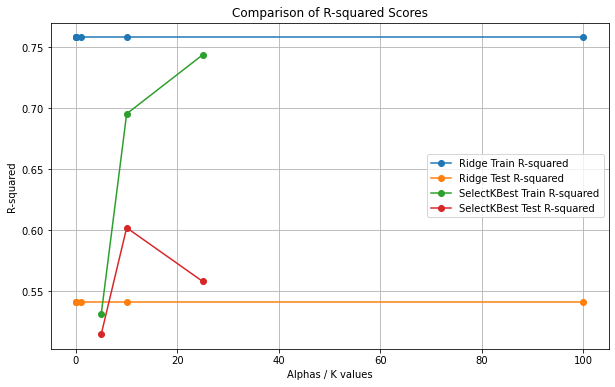

In [67]:
import matplotlib.pyplot as plt

# Ridge regression results
ridge_alphas = [0.001, 0.01, 0.1, 1, 10, 100] 
ridge_train_scores = [0.7582, 0.7582, 0.7582, 0.7582, 0.7582, 0.7582]  
ridge_test_scores = [0.5409, 0.5409, 0.5409, 0.5409, 0.5409, 0.5409]  

# SelectKBest results
k_values = [25, 10, 5]  # Assuming these are the k values used
selectkbest_train_scores = [0.7440, 0.6955, 0.5316]  
selectkbest_test_scores = [0.5579, 0.6020, 0.5148]  
# Plotting train and test R-squared scores
plt.figure(figsize=(10, 6))

# Ridge Regression R-squared scores
plt.plot(ridge_alphas, ridge_train_scores, marker='o', label='Ridge Train R-squared')
plt.plot(ridge_alphas, ridge_test_scores, marker='o', label='Ridge Test R-squared')

# SelectKBest R-squared scores
plt.plot(k_values, selectkbest_train_scores, marker='o', label='SelectKBest Train R-squared')
plt.plot(k_values, selectkbest_test_scores, marker='o', label='SelectKBest Test R-squared')

plt.xlabel('Alphas / K values')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared Scores')
plt.legend()
plt.grid(True)
plt.show()


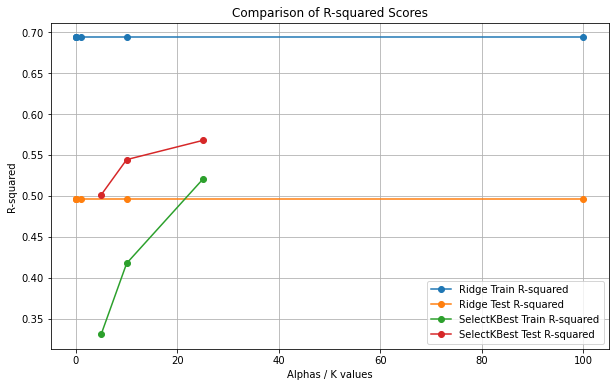

In [68]:
import matplotlib.pyplot as plt

# Ridge regression results
ridge_alphas = [0.001, 0.01, 0.1, 1, 10, 100]  
ridge_train_scores = [0.6933, 0.6933, 0.6933, 0.6933, 0.6933, 0.6933]  
ridge_test_scores = [0.4967, 0.4967, 0.4967, 0.4967, 0.4967, 0.4967]  

# SelectKBest results
k_values = [25, 10, 5]  # Assuming these are the k values used
selectkbest_train_scores = [0.5203, 0.4178, 0.3316]  
selectkbest_test_scores = [0.5677, 0.5443, 0.5015]  

# Plotting train and test R-squared scores
plt.figure(figsize=(10, 6))

# Ridge Regression R-squared scores
plt.plot(ridge_alphas, ridge_train_scores, marker='o', label='Ridge Train R-squared')
plt.plot(ridge_alphas, ridge_test_scores, marker='o', label='Ridge Test R-squared')

# SelectKBest R-squared scores
plt.plot(k_values[:len(selectkbest_train_scores)], selectkbest_train_scores, marker='o', label='SelectKBest Train R-squared')
plt.plot(k_values[:len(selectkbest_test_scores)], selectkbest_test_scores, marker='o', label='SelectKBest Test R-squared')

plt.xlabel('Alphas / K values')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared Scores')
plt.legend()
plt.grid(True)
plt.show()


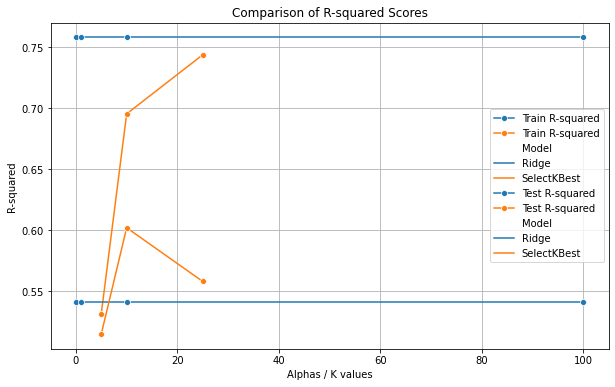

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ridge regression results
ridge_alphas = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_train_scores = [0.7582, 0.7582, 0.7582, 0.7582, 0.7582, 0.7582]
ridge_test_scores = [0.5409, 0.5409, 0.5409, 0.5409, 0.5409, 0.5409]

# SelectKBest results
k_values = [25, 10, 5]
selectkbest_train_scores = [0.7440, 0.6955, 0.5316]
selectkbest_test_scores = [0.5579, 0.6020, 0.5148]

# Combine data into a DataFrame for Seaborn plotting
import pandas as pd

data = {
    'Alphas/K values': ridge_alphas + k_values,
    'Train R-squared': ridge_train_scores + selectkbest_train_scores,
    'Test R-squared': ridge_test_scores + selectkbest_test_scores,
    'Model': ['Ridge'] * len(ridge_alphas) + ['SelectKBest'] * len(k_values)
}

df = pd.DataFrame(data)

# Plotting using Seaborn
plt.figure(figsize=(10, 6))

sns.lineplot(x='Alphas/K values', y='Train R-squared', hue='Model', data=df, marker='o', label='Train R-squared')
sns.lineplot(x='Alphas/K values', y='Test R-squared', hue='Model', data=df, marker='o', label='Test R-squared')

plt.xlabel('Alphas / K values')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared Scores')
plt.legend()
plt.grid(True)
plt.show()


In [89]:
import pandas as pd
import sqlite3

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('catheter_shipments.csv', encoding='latin-1')

# Establish a connection to the SQLite database
conn = sqlite3.connect('df_table.db')

# Convert the DataFrame to a SQLite table
df.to_sql('df_table', conn, index=False, if_exists='replace')

# Define SQL query to get the top 5 accounts for each month
query = '''
    SELECT customer_account_name, month, item, product_group, product_sub_type, SUM(revenue) AS total_revenue
    FROM df_table
    GROUP BY customer_account_name, month, item, product_group, product_sub_type
    ORDER BY month, total_revenue DESC
'''

# Execute the query using pandas
df_result = pd.read_sql_query(query, conn)

# Get top 5 accounts by revenue for each quarter
top_accounts_by_month = df_result.groupby('month').apply(lambda x: x.nlargest(10, 'total_revenue')).reset_index(drop=True)

# Display the top 10 accounts by revenue for each month
print(top_accounts_by_month)

# Close the connection
conn.close()

C:\Users\mark.hanson\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


                                 customer_account_name      month  \
0                     ALLERGAN PHARMACEUTICALS IRELAND  2018 / 01   
1                                    DUOMED BELGIUM NV  2018 / 01   
2                                   DRASKO SIMOVIC, MD  2018 / 01   
3                          YOUNG WOO MEDITECH CO., LTD  2018 / 01   
4                    GROSSINGER NEURO PAIN SPECIALISTS  2018 / 01   
..                                                 ...        ...   
686                   CENTRAL NEURO SYSTEMS TRADING CO  2023 / 09   
687       SICHUAN SANSHENGCHUANGXIN TECHNOLOGY CO.,LTD  2023 / 09   
688                                         MAG2HEALTH  2023 / 09   
689                                       ALMEVAN S.L.  2023 / 09   
690  KAISER PERMANENTE SOUTH SACRAMENTO MEDICAL CENTER  2023 / 10   

            item       product_group product_sub_type  total_revenue  
0        95355WW                 EMG          Needles       84785.15  
1         S53153             

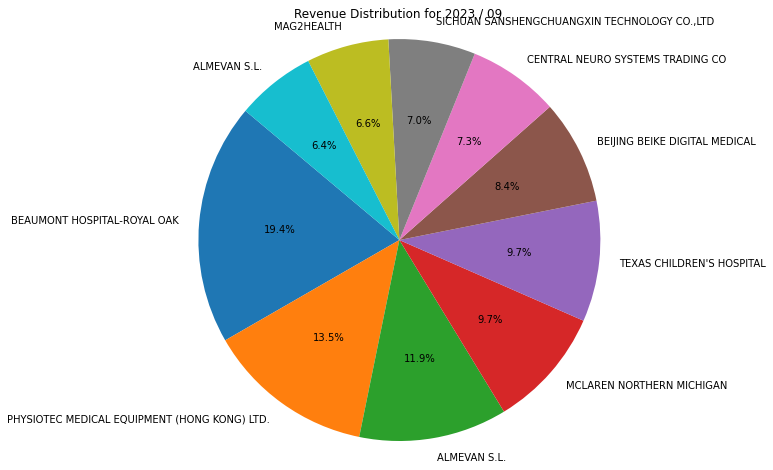

In [90]:
import matplotlib.pyplot as plt

# specific selection of a month and year in dataset format
month_to_plot = '2023 / 09'  # pie chart with 10 pie slices, still appears more interesting

# Filter data for the selected quarter
month_data = top_accounts_by_month[top_accounts_by_month['month'].str.startswith(month_to_plot)]

# Plotting a pie chart for the selected quarter
plt.figure(figsize=(8, 8))
plt.pie(month_data['total_revenue'], labels=month_data['customer_account_name'], autopct='%1.1f%%', startangle=140)
plt.title(f'Revenue Distribution for {month_to_plot}')
plt.axis('equal')
plt.show()

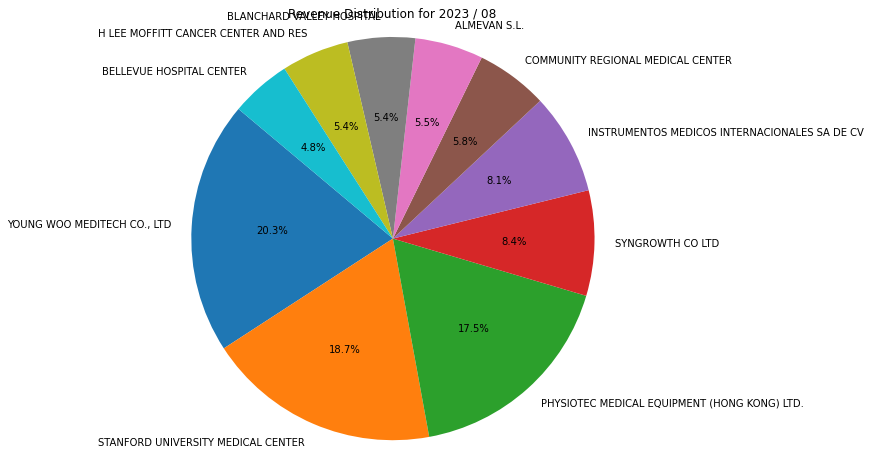

In [91]:
import matplotlib.pyplot as plt

# specific selection of a month and year in dataset format
month_to_plot = '2023 / 08'  # pie chart with 10 pie slices, still appears more interesting

# Filter data for the selected quarter
month_data = top_accounts_by_month[top_accounts_by_month['month'].str.startswith(month_to_plot)]

# Plotting a pie chart for the selected quarter
plt.figure(figsize=(8, 8))
plt.pie(month_data['total_revenue'], labels=month_data['customer_account_name'], autopct='%1.1f%%', startangle=140)
plt.title(f'Revenue Distribution for {month_to_plot}')
plt.axis('equal')
plt.show()

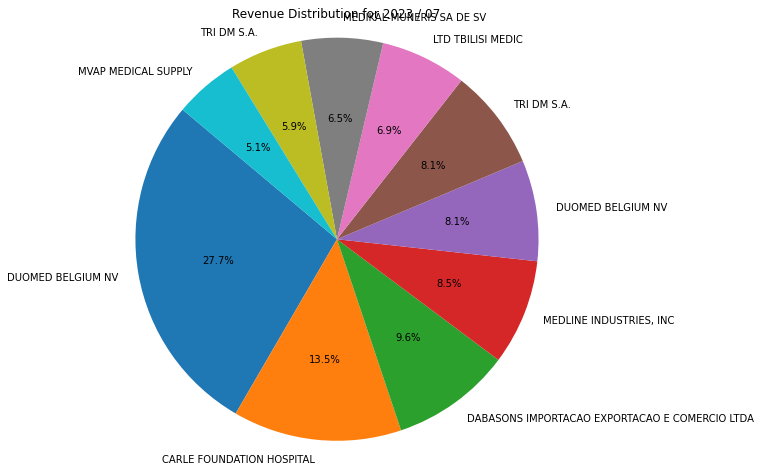

In [92]:
import matplotlib.pyplot as plt

# specific selection of a month and year in dataset format
month_to_plot = '2023 / 07'  # pie chart with 10 pie slices, still appears more interesting

# Filter data for the selected quarter
month_data = top_accounts_by_month[top_accounts_by_month['month'].str.startswith(month_to_plot)]

# Plotting a pie chart for the selected quarter
plt.figure(figsize=(8, 8))
plt.pie(month_data['total_revenue'], labels=month_data['customer_account_name'], autopct='%1.1f%%', startangle=140)
plt.title(f'Revenue Distribution for {month_to_plot}')
plt.axis('equal')
plt.show()

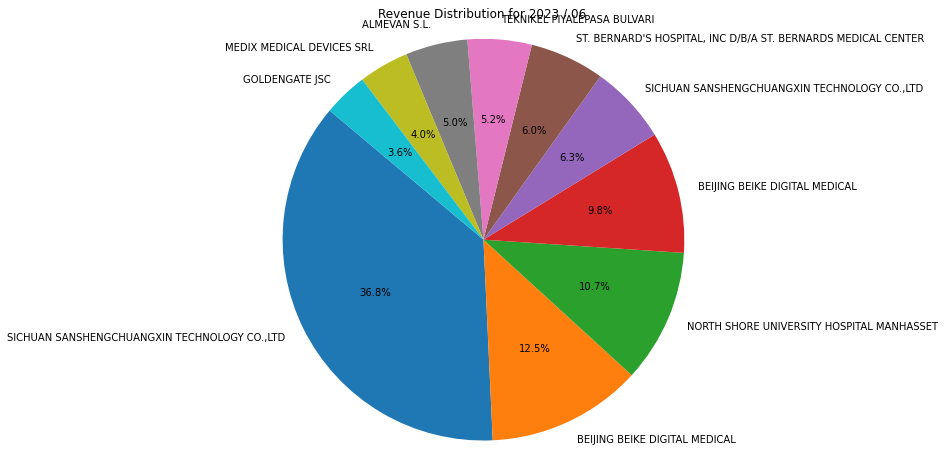

In [93]:
import matplotlib.pyplot as plt

# specific selection of a month and year in dataset format
month_to_plot = '2023 / 06'  # pie chart with 10 pie slices, still appears more interesting

# Filter data for the selected quarter
month_data = top_accounts_by_month[top_accounts_by_month['month'].str.startswith(month_to_plot)]

# Plotting a pie chart for the selected quarter
plt.figure(figsize=(8, 8))
plt.pie(month_data['total_revenue'], labels=month_data['customer_account_name'], autopct='%1.1f%%', startangle=140)
plt.title(f'Revenue Distribution for {month_to_plot}')
plt.axis('equal')
plt.show()

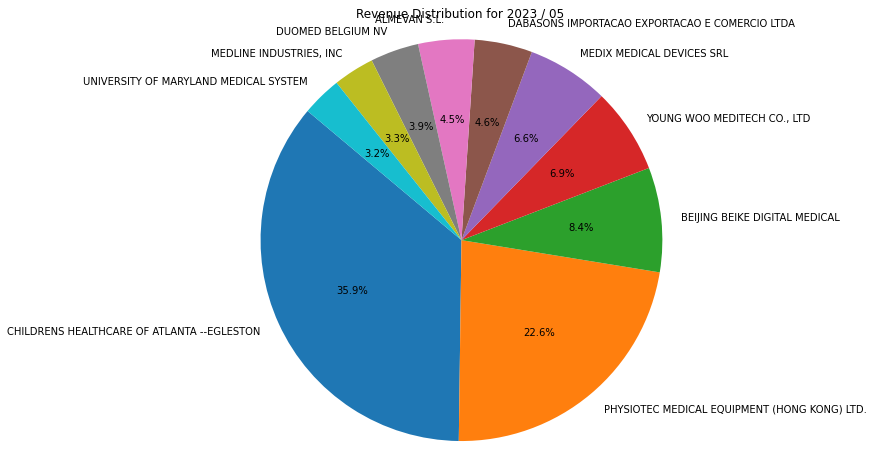

In [94]:
import matplotlib.pyplot as plt

# specific selection of a month and year in dataset format
month_to_plot = '2023 / 05'  # pie chart with 10 pie slices, still appears more interesting

# Filter data for the selected quarter
month_data = top_accounts_by_month[top_accounts_by_month['month'].str.startswith(month_to_plot)]

# Plotting a pie chart for the selected quarter
plt.figure(figsize=(8, 8))
plt.pie(month_data['total_revenue'], labels=month_data['customer_account_name'], autopct='%1.1f%%', startangle=140)
plt.title(f'Revenue Distribution for {month_to_plot}')
plt.axis('equal')
plt.show()

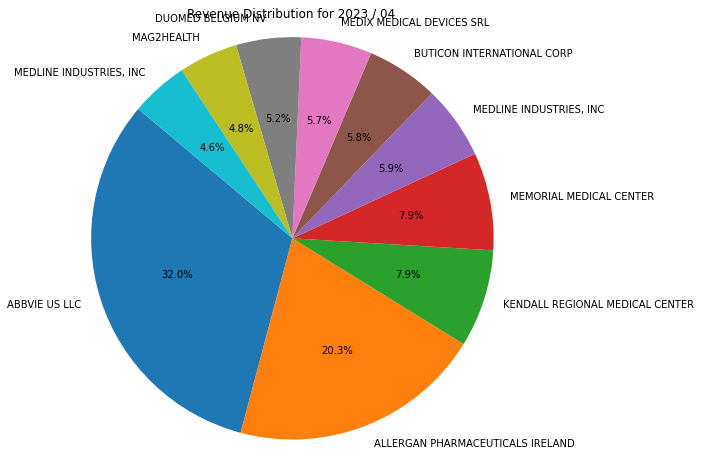

In [95]:
import matplotlib.pyplot as plt

# specific selection of a month and year in dataset format
month_to_plot = '2023 / 04'  # pie chart with 10 pie slices, still appears more interesting

# Filter data for the selected quarter
month_data = top_accounts_by_month[top_accounts_by_month['month'].str.startswith(month_to_plot)]

# Plotting a pie chart for the selected quarter
plt.figure(figsize=(8, 8))
plt.pie(month_data['total_revenue'], labels=month_data['customer_account_name'], autopct='%1.1f%%', startangle=140)
plt.title(f'Revenue Distribution for {month_to_plot}')
plt.axis('equal')
plt.show()

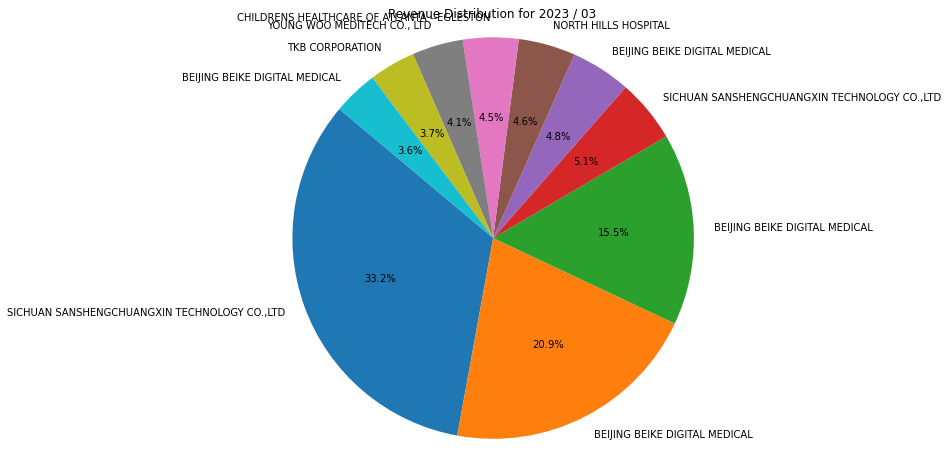

In [96]:
import matplotlib.pyplot as plt

# specific selection of a month and year in dataset format
month_to_plot = '2023 / 03'  # pie chart with 10 pie slices, still appears more interesting

# Filter data for the selected quarter
month_data = top_accounts_by_month[top_accounts_by_month['month'].str.startswith(month_to_plot)]

# Plotting a pie chart for the selected quarter
plt.figure(figsize=(8, 8))
plt.pie(month_data['total_revenue'], labels=month_data['customer_account_name'], autopct='%1.1f%%', startangle=140)
plt.title(f'Revenue Distribution for {month_to_plot}')
plt.axis('equal')
plt.show()

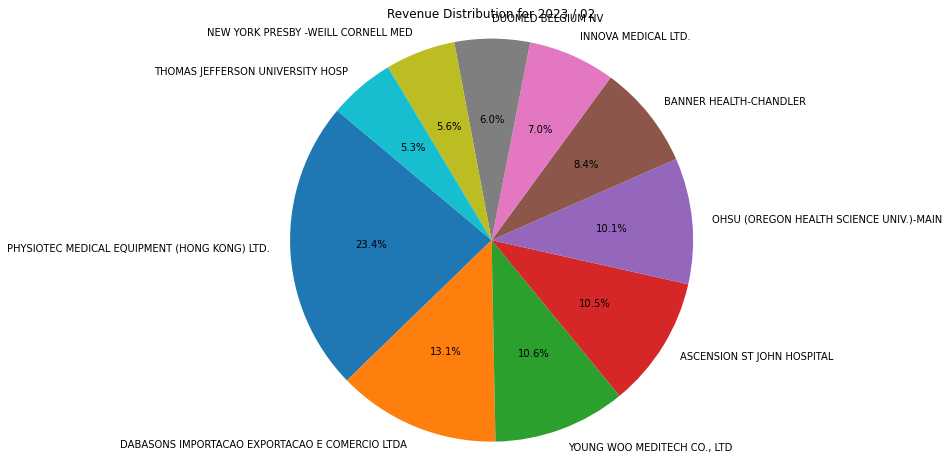

In [97]:
import matplotlib.pyplot as plt

# specific selection of a month and year in dataset format
month_to_plot = '2023 / 02'  # pie chart with 10 pie slices, still appears more interesting

# Filter data for the selected quarter
month_data = top_accounts_by_month[top_accounts_by_month['month'].str.startswith(month_to_plot)]

# Plotting a pie chart for the selected quarter
plt.figure(figsize=(8, 8))
plt.pie(month_data['total_revenue'], labels=month_data['customer_account_name'], autopct='%1.1f%%', startangle=140)
plt.title(f'Revenue Distribution for {month_to_plot}')
plt.axis('equal')
plt.show()

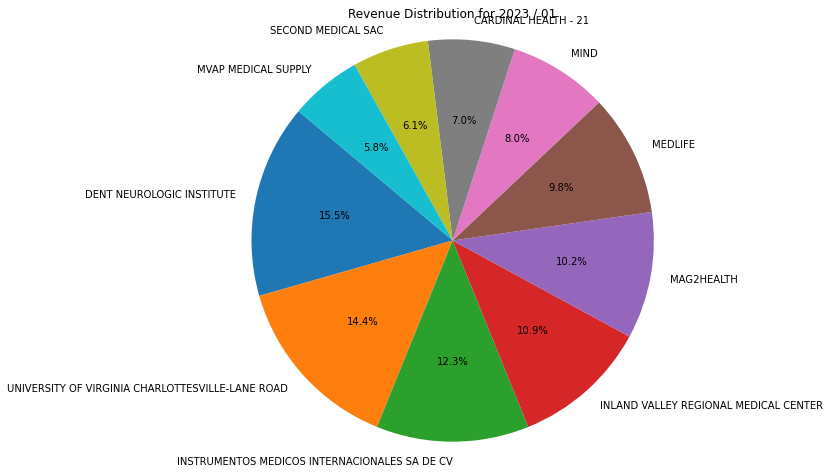

In [98]:
import matplotlib.pyplot as plt

# specific selection of a month and year in dataset format
month_to_plot = '2023 / 01'  # pie chart with 10 pie slices, still appears more interesting

# Filter data for the selected quarter
month_data = top_accounts_by_month[top_accounts_by_month['month'].str.startswith(month_to_plot)]

# Plotting a pie chart for the selected quarter
plt.figure(figsize=(8, 8))
plt.pie(month_data['total_revenue'], labels=month_data['customer_account_name'], autopct='%1.1f%%', startangle=140)
plt.title(f'Revenue Distribution for {month_to_plot}')
plt.axis('equal')
plt.show()

In [99]:
import statsmodels.api as sm

# total_revenue' is the target variable and month is the predictor variable
X = pd.get_dummies(top_accounts_by_month['month'], drop_first=True)  # Convert 'month' to dummy variables
y = top_accounts_by_month['total_revenue']  # Target variable

X = sm.add_constant(X)  # Add a constant for intercept

model = sm.OLS(y, X).fit()  # Fit Ordinary Least Squares (OLS) regression model

In [100]:
from sklearn.linear_model import LinearRegression

# total_revenue is the target variable and month is the predictor variable
X = pd.get_dummies(top_accounts_by_month['month'], drop_first=True)  # Convert 'month' to dummy variables
y = top_accounts_by_month['total_revenue']  # Target variable

model = LinearRegression()
model.fit(X, y)  # Fit Linear Regression model


LinearRegression()

In [101]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [ 1.95237600e+03  1.48148500e+04  2.82821700e+03  1.74172290e+04
  8.99626280e+04  1.92198500e+03  3.26384100e+04  5.40587790e+04
  2.11666590e+04  5.19804910e+04  3.03201290e+04 -9.74830000e+01
  5.69728250e+04  1.60862490e+04  4.54163000e+03  9.03334700e+03
  7.08913510e+04  1.65469800e+03  3.44004930e+04  7.23322180e+04
  2.11046570e+04  4.87735200e+03  6.18188990e+04 -5.02020700e+03
 -1.86742700e+03  6.61333500e+04 -9.87192700e+03  3.11224250e+04
  3.10733850e+04  6.10359000e+03  2.06555280e+04  8.86427670e+04
  1.09140490e+04  4.78351650e+04  8.47216690e+04  3.72250930e+04
 -2.08687100e+03  8.58435090e+04 -2.07657300e+03  1.09968600e+05
  1.89512610e+04  9.79868500e+03  3.49813670e+04  2.98358610e+04
  1.71506070e+04  1.30903000e+04  4.78014690e+04 -3.95718600e+03
  6.60312410e+04  8.42748470e+04  8.11907700e+03  4.51893490e+04
  1.57493920e+04  9.75790000e+02  6.10808730e+04  1.38141309e+05
  4.34004340e+04  6.67839330e+04  1.55357090e+04 -5.55123100e+03
  1.1979951

In [103]:
import statsmodels.api as sm

# total_revenue is the target variable, and five different predictor variables
X = pd.get_dummies(top_accounts_by_month[['month', 'customer_account_name', 
                                          'item', 'product_group', 
                                          'product_sub_type']], drop_first=True)  # Convert categorical variables to dummies
y = top_accounts_by_month['total_revenue']  # Target variable

X = sm.add_constant(X)  # Add a constant for intercept

model = sm.OLS(y, X).fit()  # Fit Ordinary Least Squares (OLS) multiple regression model

In [105]:
print(model.summary)

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x000001EAA6668460>>


In [106]:
from sklearn.linear_model import LinearRegression

# total_revenue is the target variable, and five different predictor variables
X = pd.get_dummies(top_accounts_by_month[['month', 'customer_account_name', 
                                         'item', 'product_group', 
                                         'product_sub_type']], drop_first=True)  # Convert categorical variables to dummies
y = top_accounts_by_month['total_revenue']  # Target variable

model = LinearRegression()
model.fit(X, y)  # Fit Linear Regression model

LinearRegression()

In [107]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [-1.89738329e+03  1.30511120e+04  3.11333550e+03  1.37360278e+04
  4.39521610e+04  1.49524215e+02  2.88406651e+04  1.03605670e+04
  6.47721446e+03  4.50392497e+03  2.76053462e+04  3.04784607e+02
  2.96934516e+03  7.28070648e+03  5.50249874e+03 -2.78967192e+04
  3.81660340e+04 -5.13089610e+03  1.12419599e+03  3.35610103e+04
  1.48527907e+04  4.98430193e+03  2.35953196e+04  8.93540165e+03
  1.67365168e+04  7.29962319e+03 -8.83011491e+03  1.01626562e+04
  1.16622671e+04 -2.06281316e+04  1.93714342e+02  4.11737130e+04
 -1.66013890e+04  3.85602698e+04  3.35417040e+04  2.11449787e+04
 -1.48589049e+03  2.87803524e+04  8.09167932e+03  9.56700906e+04
 -3.09140700e+03  1.52425179e+04  2.88227484e+04  1.74340953e+04
  3.21476253e+03  1.37575586e+04  3.26404443e+04 -2.03184426e+03
  5.25948465e+04  5.45555480e+04 -3.32547636e+02  2.18231664e+04
  2.18806598e+04 -1.76144011e+03  3.70956947e+04  8.22188582e+04
  1.88970255e+04  2.37261000e+04  2.56424916e+04  7.07537414e+03
  1.5192384

In [108]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

# total_revenue is the target variable, and five different predictor variables
X = pd.get_dummies(top_accounts_by_month[['month', 'customer_account_name', 
                                         'item', 'product_group',
                                         'product_sub_type']], 
                   drop_first=True)  # Convert categorical variables to dummies
y = top_accounts_by_month['total_revenue']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for alpha values
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize Ridge regression
ridge = Ridge()

# Use GridSearchCV to find the best alpha value using cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=25)
grid_search.fit(X_train_scaled, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha value: {best_alpha}")

# Train Ridge regression using the best alpha
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train_scaled, y_train)

# Evaluate the model
train_score = best_ridge.score(X_train_scaled, y_train)
test_score = best_ridge.score(X_test_scaled, y_test)
print(f"Train R-squared: {train_score:.4f}")
print(f"Test R-squared: {test_score:.4f}")


Best alpha value: 100
Train R-squared: 0.7014
Test R-squared: 0.3601


In [109]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

# total_revenue is the target variable, and five different predictor variables
X = pd.get_dummies(top_accounts_by_month[['month', 'customer_account_name', 
                                         'item', 'product_group',
                                         'product_sub_type']], 
                   drop_first=True)  # Convert categorical variables to dummies
y = top_accounts_by_month['total_revenue']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for alpha values
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize Ridge regression
ridge = Ridge()

# Use GridSearchCV to find the best alpha value using cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=10)
grid_search.fit(X_train_scaled, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha value: {best_alpha}")

# Train Ridge regression using the best alpha
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train_scaled, y_train)

# Evaluate the model
train_score = best_ridge.score(X_train_scaled, y_train)
test_score = best_ridge.score(X_test_scaled, y_test)
print(f"Train R-squared: {train_score:.4f}")
print(f"Test R-squared: {test_score:.4f}")


Best alpha value: 100
Train R-squared: 0.7014
Test R-squared: 0.3601


In [110]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

# total_revenue is the target variable, and five different predictor variables
X = pd.get_dummies(top_accounts_by_month[['month', 'customer_account_name', 
                                         'item', 'product_group',
                                         'product_sub_type']], 
                   drop_first=True)  # Convert categorical variables to dummies
y = top_accounts_by_month['total_revenue']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for alpha values
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize Ridge regression
ridge = Ridge()

# Use GridSearchCV to find the best alpha value using cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha value: {best_alpha}")

# Train Ridge regression using the best alpha
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train_scaled, y_train)

# Evaluate the model
train_score = best_ridge.score(X_train_scaled, y_train)
test_score = best_ridge.score(X_test_scaled, y_test)
print(f"Train R-squared: {train_score:.4f}")
print(f"Test R-squared: {test_score:.4f}")


Best alpha value: 100
Train R-squared: 0.7014
Test R-squared: 0.3601


In [111]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# total_revenue is the target variable, and five different predictor variables
X = pd.get_dummies(top_accounts_by_month[['month', 'customer_account_name', 
                                         'item', 'product_group',
                                         'product_sub_type']], drop_first=True)
y = top_accounts_by_month['total_revenue']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Select top k features based on f_regression scores
selector = SelectKBest(score_func=f_regression, k=25)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Initialize and train Ridge regression
ridge = Ridge(alpha=1.0)  # You can set your alpha value here
ridge.fit(X_train_selected, y_train)

# Predict on train and test sets
train_preds = ridge.predict(X_train_selected)
test_preds = ridge.predict(X_test_selected)

# Calculate R-squared scores
train_score = r2_score(y_train, train_preds)
test_score = r2_score(y_test, test_preds)

print(f"Train R-squared: {train_score:.4f}")
print(f"Test R-squared: {test_score:.4f}")


Train R-squared: 0.5572
Test R-squared: 0.4104


C:\Users\mark.hanson\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms


In [112]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# total_revenue is the target variable, and five different predictor variables
X = pd.get_dummies(top_accounts_by_month[['month', 'customer_account_name', 
                                         'item', 'product_group',
                                         'product_sub_type']], drop_first=True)
y = top_accounts_by_month['total_revenue']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Select top k features based on f_regression scores
selector = SelectKBest(score_func=f_regression, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Initialize and train Ridge regression
ridge = Ridge(alpha=1.0)  # You can set your alpha value here
ridge.fit(X_train_selected, y_train)

# Predict on train and test sets
train_preds = ridge.predict(X_train_selected)
test_preds = ridge.predict(X_test_selected)

# Calculate R-squared scores
train_score = r2_score(y_train, train_preds)
test_score = r2_score(y_test, test_preds)

print(f"Train R-squared: {train_score:.4f}")
print(f"Test R-squared: {test_score:.4f}")


Train R-squared: 0.4296
Test R-squared: 0.2326


C:\Users\mark.hanson\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms


In [113]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# total_revenue is the target variable, and five different predictor variables

X = pd.get_dummies(top_accounts_by_month[['month', 'customer_account_name', 
                                          'item', 'product_group', 
                                          'product_sub_type']], drop_first=True)
y = top_accounts_by_month['total_revenue']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

# Preprocessing: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Select top k features based on f_regression scores
selector = SelectKBest(score_func=f_regression, k=5)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Initialize and train Ridge regression
ridge = Ridge(alpha=1.0)  # You can set your alpha value here
ridge.fit(X_train_selected, y_train)

# Predict on train and test sets
train_preds = ridge.predict(X_train_selected)
test_preds = ridge.predict(X_test_selected)

# Calculate R-squared scores
train_score = r2_score(y_train, train_preds)
test_score = r2_score(y_test, test_preds)

print(f"Train R-squared: {train_score:.4f}")
print(f"Test R-squared: {test_score:.4f}")


Train R-squared: 0.2930
Test R-squared: 0.1761


C:\Users\mark.hanson\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms


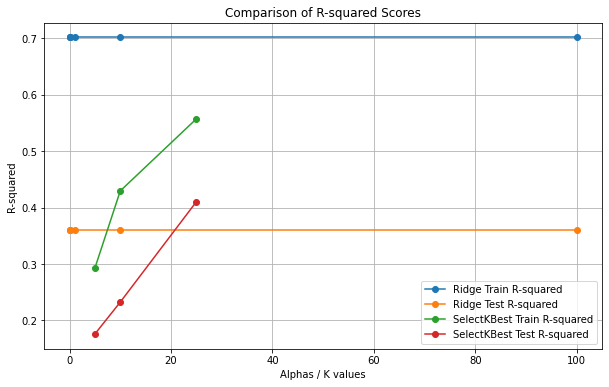

In [114]:
import matplotlib.pyplot as plt

# Ridge regression results
ridge_alphas = [0.001, 0.01, 0.1, 1, 10, 100] 
ridge_train_scores = [0.7014, 0.7014, 0.7014, 0.7014, 0.7014, 0.7014]  
ridge_test_scores = [0.3601, 0.3601, 0.3601, 0.3601, 0.3601, 0.3601]  

# SelectKBest results
k_values = [25, 10, 5]  # Assuming these are the k values used
selectkbest_train_scores = [0.5572, 0.4296, 0.2930]  
selectkbest_test_scores = [0.4104, 0.2326, 0.1761]  
# Plotting train and test R-squared scores
plt.figure(figsize=(10, 6))

# Ridge Regression R-squared scores
plt.plot(ridge_alphas, ridge_train_scores, marker='o', label='Ridge Train R-squared')
plt.plot(ridge_alphas, ridge_test_scores, marker='o', label='Ridge Test R-squared')

# SelectKBest R-squared scores
plt.plot(k_values, selectkbest_train_scores, marker='o', label='SelectKBest Train R-squared')
plt.plot(k_values, selectkbest_test_scores, marker='o', label='SelectKBest Test R-squared')

plt.xlabel('Alphas / K values')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared Scores')
plt.legend()
plt.grid(True)
plt.show()



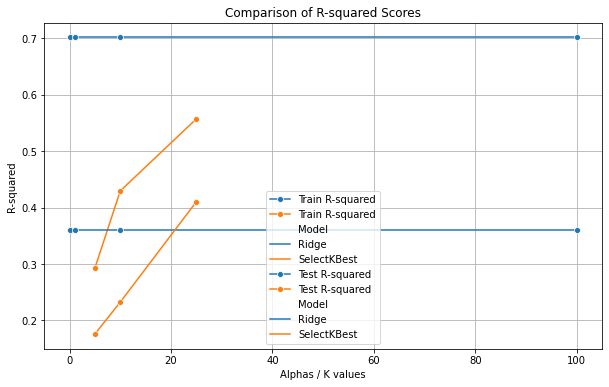

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ridge regression results
ridge_alphas = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_train_scores = [0.7014, 0.7014, 0.7014, 0.7014, 0.7014, 0.7014]  
ridge_test_scores = [0.3601, 0.3601, 0.3601, 0.3601, 0.3601, 0.3601]  

# SelectKBest results
k_values = [25, 10, 5]
selectkbest_train_scores = [0.5572, 0.4296, 0.2930]  
selectkbest_test_scores = [0.4104, 0.2326, 0.1761]  

# Combine data into a DataFrame for Seaborn plotting
import pandas as pd

data = {
    'Alphas/K values': ridge_alphas + k_values,
    'Train R-squared': ridge_train_scores + selectkbest_train_scores,
    'Test R-squared': ridge_test_scores + selectkbest_test_scores,
    'Model': ['Ridge'] * len(ridge_alphas) + ['SelectKBest'] * len(k_values)
}

df = pd.DataFrame(data)

# Plotting using Seaborn
plt.figure(figsize=(10, 6))

sns.lineplot(x='Alphas/K values', y='Train R-squared', hue='Model', data=df, marker='o', label='Train R-squared')
sns.lineplot(x='Alphas/K values', y='Test R-squared', hue='Model', data=df, marker='o', label='Test R-squared')

plt.xlabel('Alphas / K values')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared Scores')
plt.legend()
plt.grid(True)
plt.show()
